# Import Packages

In [1]:
library(dplyr)
library(tidyr)
library(IDPmisc)
library(ggplot2)
library(repr) # options() to change size of plot image


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# Import Data

#### Data from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts, retrieved from [Kaggle](https://www.kaggle.com/captainozlem/framingham-chd-preprocessed-data)

### Variables:
- Gender (__male__): male or female (Categorical: 0 = Female, 1 = Male)
- __age__: Age of the patient - (Continuous)
- __education__: level of education (Categorical: 0 = High School degree or less, 1 = College Degree and Higher)
- __currentSmoker__: whether or not the patient is a current smoker (Categorical: 0 = Nonsmoker, 1 = Smoker)
- __cigsPerDay__: the number of cigarettes that the person smoked on average in one day (Continuous)
- __BPMeds__: whether or not the patient was on blood pressure medication (Categorical: 0 = No, 1 = Yes)
- __prevalentStroke__: whether or not the patient had previously had a stroke (Categorical: 0 = No, 1 = Yes)
- __prevalentHyp__: whether or not the patient was hypertensive (Categorical: 0 = No, 1 = Yes)
- __diabetes__: whether or not the patient had diabetes (Categorical: 0 = No, 1 = Yes)
- __totChol__: total cholesterol level (Continuous)
- __sysBP__: systolic blood pressure (Continuous)
- __diaBP__: diastolic blood pressure (Continuous)
- __BMI__: Body Mass Index (Continuous)
- __heartRate__: heart rate (Continuous)
- __glucose__: glucose level (Continuous)

### Target variable
- __TenYearCHD__: 10 year risk of coronary heart disease CHD (Categorical: 1 = Yes, 0 = No)

In [2]:
kgheart = read.csv('/Users/silviacatalina/Google Drive/BethelTech/GitHub/FinalProject/Data/CHD_preprocessed.csv')
head(kgheart)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,39,1,0,0,0,0,0,0,195,106.0,70,26.97,80,77,0
2,0,46,0,0,0,0,0,0,0,250,121.0,81,28.73,95,76,0
3,1,48,0,1,20,0,0,0,0,245,127.5,80,25.34,75,70,0
4,0,61,1,1,30,0,0,1,0,225,150.0,95,28.58,65,103,1
5,0,46,1,1,23,0,0,0,0,285,130.0,84,23.10,85,85,0
6,0,43,0,0,0,0,0,1,0,228,180.0,110,30.30,77,99,0


In [23]:
str(kgheart)

'data.frame':	4133 obs. of  16 variables:
 $ male           : int  1 0 1 0 0 0 0 0 1 1 ...
 $ age            : int  39 46 48 61 46 43 63 45 52 43 ...
 $ education      : int  1 0 0 1 1 0 0 0 0 0 ...
 $ currentSmoker  : int  0 0 1 1 1 0 0 1 0 1 ...
 $ cigsPerDay     : num  0 0 20 30 23 0 0 20 0 30 ...
 $ BPMeds         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ prevalentStroke: int  0 0 0 0 0 0 0 0 0 0 ...
 $ prevalentHyp   : int  0 0 0 1 0 1 0 0 1 1 ...
 $ diabetes       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ totChol        : num  195 250 245 225 285 228 205 313 260 225 ...
 $ sysBP          : num  106 121 128 150 130 ...
 $ diaBP          : num  70 81 80 95 84 110 71 71 89 107 ...
 $ BMI            : num  27 28.7 25.3 28.6 23.1 ...
 $ heartRate      : num  80 95 75 65 85 77 60 79 76 93 ...
 $ glucose        : num  77 76 70 103 85 99 85 78 79 88 ...
 $ TenYearCHD     : int  0 0 0 1 0 0 1 0 0 0 ...


# Data Exploration
***

## Age

### 1. Histogram

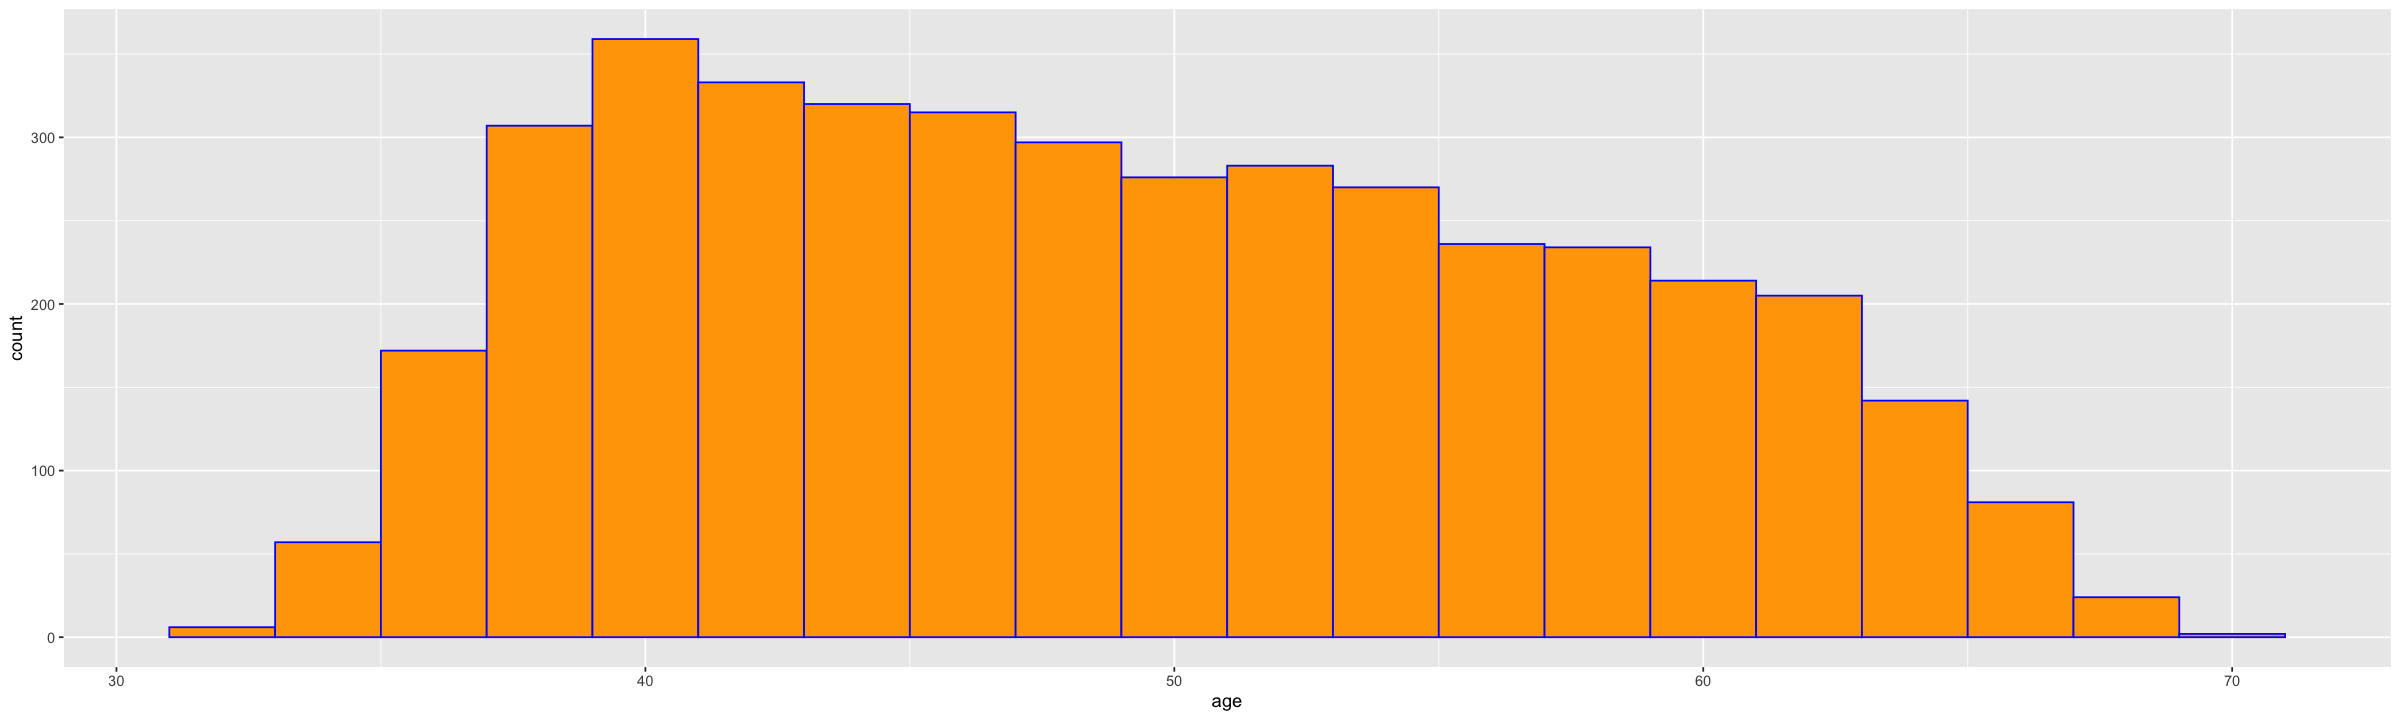

In [17]:
ggplot(data = kgheart, aes(x = age)) + geom_histogram(bins = 20, fill='orange', color = "blue")

### 2. Age Distribution by Risk for Coronary Heart Disease (CHD)

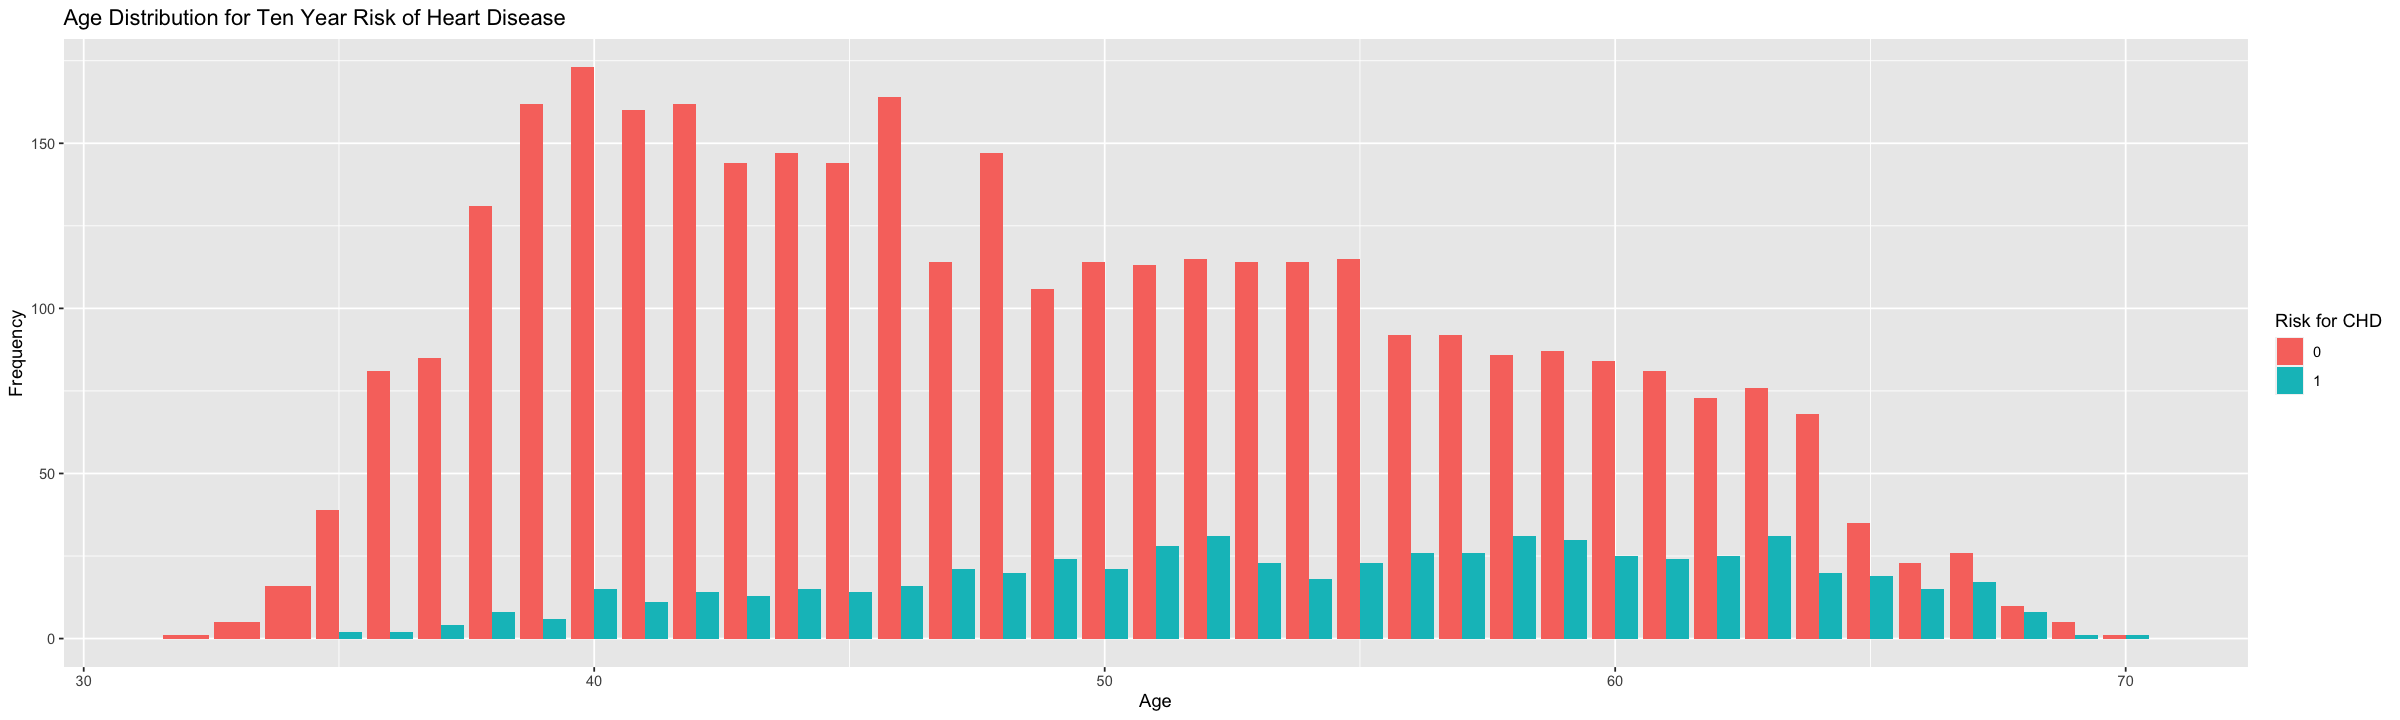

In [4]:
options(repr.plot.width=20, repr.plot.height=6)
ggplot(data = kgheart) + geom_bar(mapping = aes(x = age, fill = as.factor(TenYearCHD)), position = "dodge") + 
  ggtitle("Age Distribution for Ten Year Risk of Heart Disease") +
  xlab("Age") +
  ylab("Frequency") + scale_fill_discrete(name = "Risk for CHD")

__*Risk for CHD seems to be fairly even for ages 40 and above*__

### 3. Age Distribution by Gender

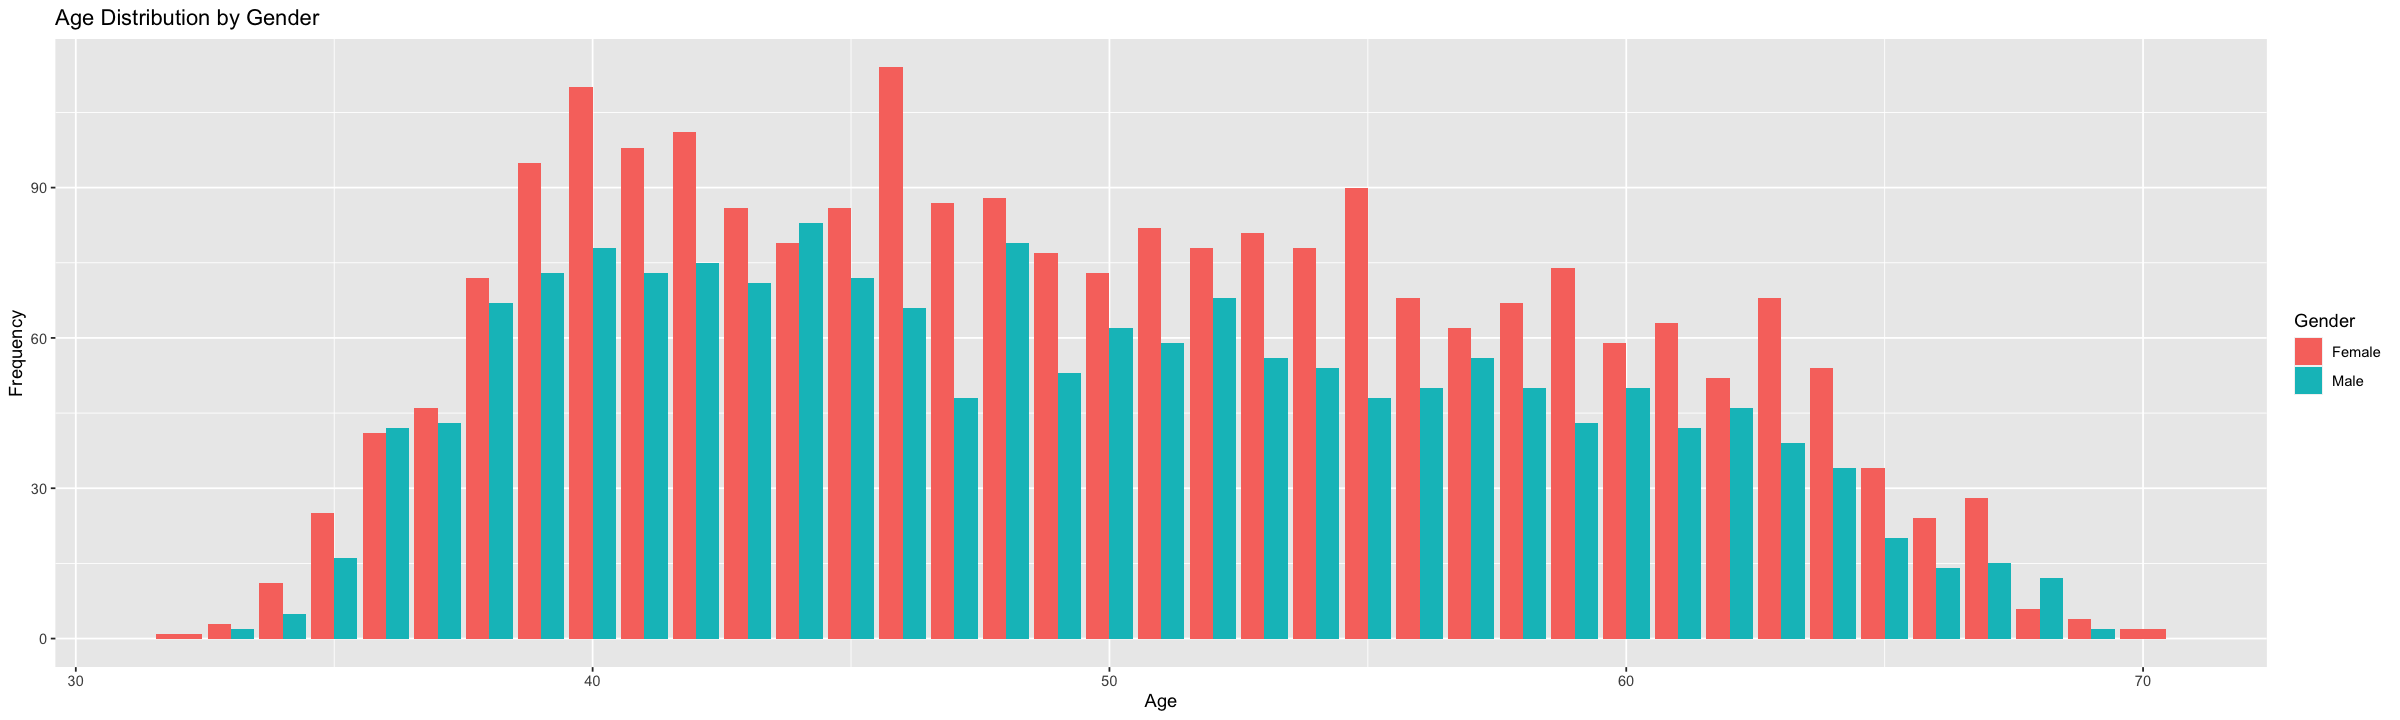

In [3]:
options(repr.plot.width=20, repr.plot.height=6)
ggplot(data = kgheart) + geom_bar(mapping = aes(x = age, fill = as.factor(male)), position = "dodge") + 
  ggtitle("Age Distribution by Gender") +
  xlab("Age") +
  ylab("Frequency") + scale_fill_discrete(name = "Gender", labels = c("Female", "Male"))

__*There are more women than men in the majority of the age groups*__

### 4. Age Distribution by Education Level

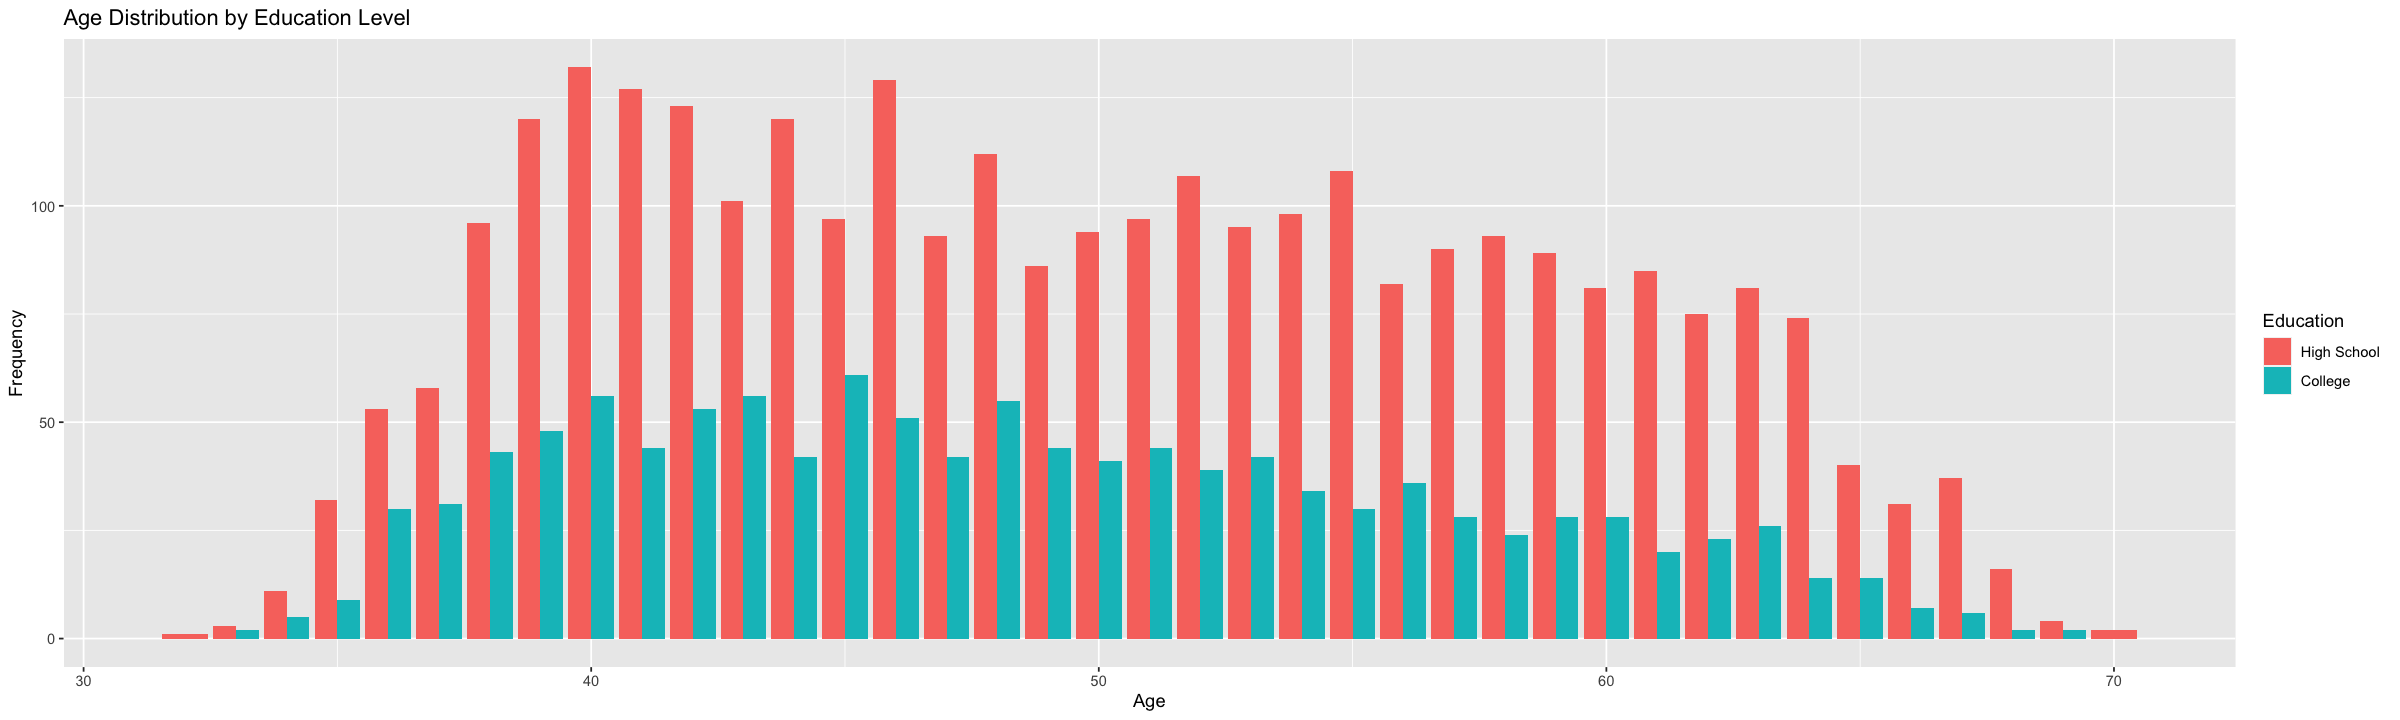

In [4]:
options(repr.plot.width=20, repr.plot.height=6)
ggplot(data = kgheart) + geom_bar(mapping = aes(x = age, fill = as.factor(education)), position = "dodge") + 
  ggtitle("Age Distribution by Education Level") +
  xlab("Age") +
  ylab("Frequency") + scale_fill_discrete(name = "Education", labels = c("High School", "College"))

**_There are overall less college graduates in this dataset_**

### 5. Age Distribution by Smoking Status 

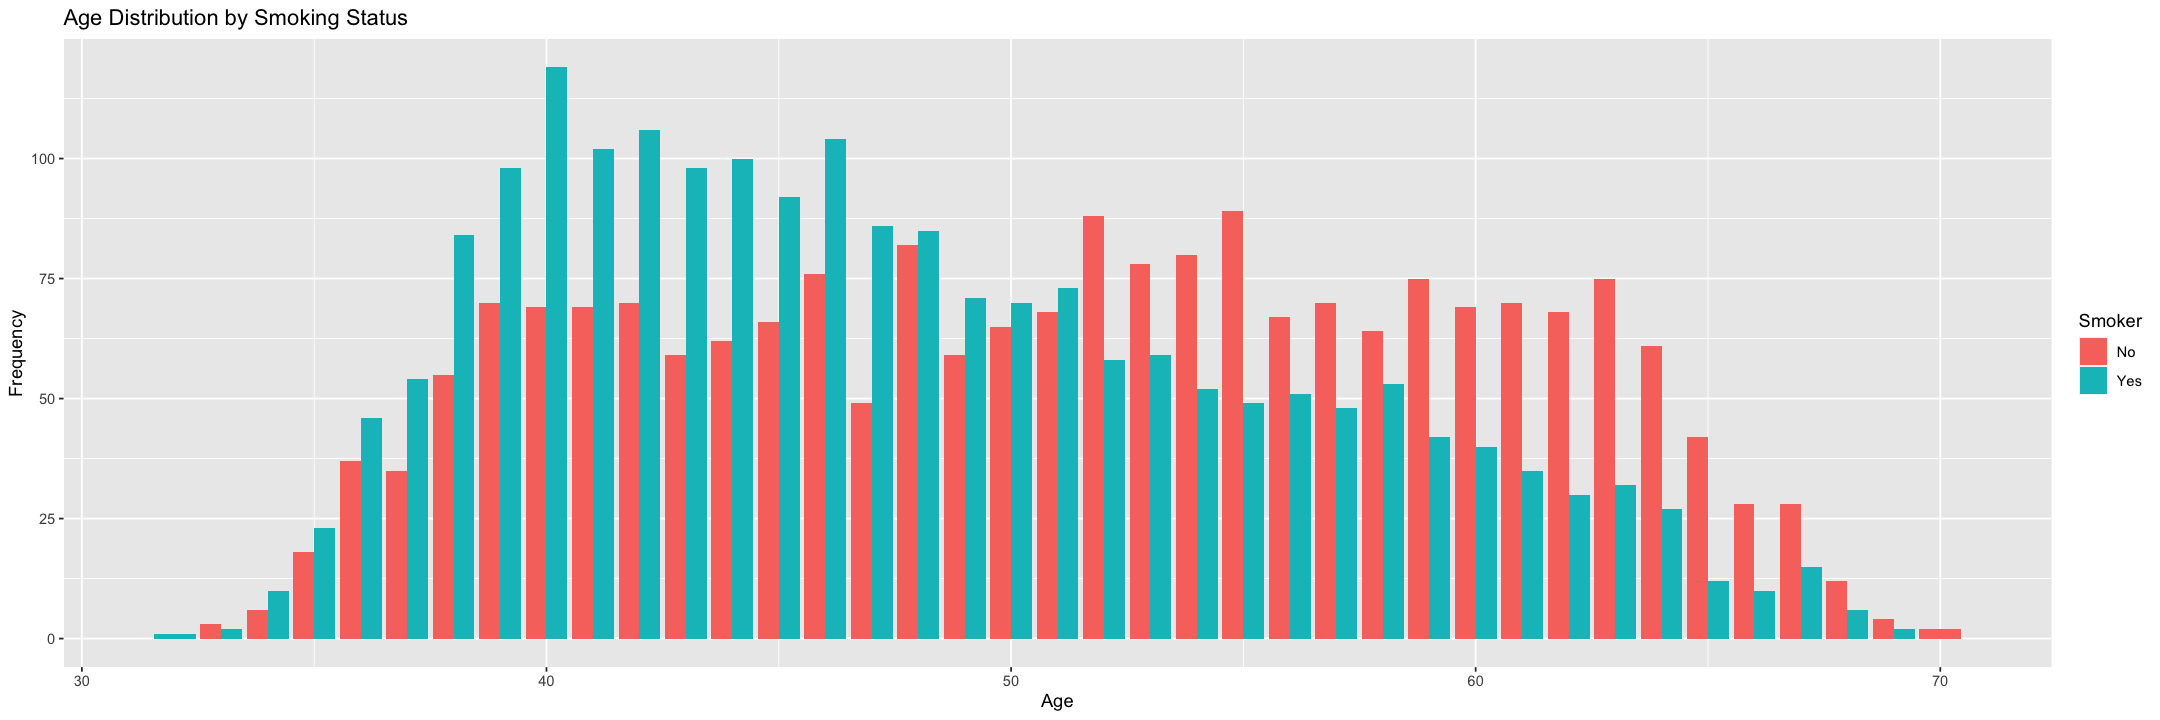

In [5]:
options(repr.plot.width=18, repr.plot.height=6)
ggplot(data = kgheart) + geom_bar(mapping = aes(x = age, fill = as.factor(currentSmoker)), position = "dodge") + 
  ggtitle("Age Distribution by Smoking Status") +
  xlab("Age") +
  ylab("Frequency") + scale_fill_discrete(name = "Smoker", labels = c("No", "Yes"))

**_There are more smokers than nonsmokers under age 50, at which point the reverse becomes true_**

### 6. Age Distribution by Prevalence of Hypertension

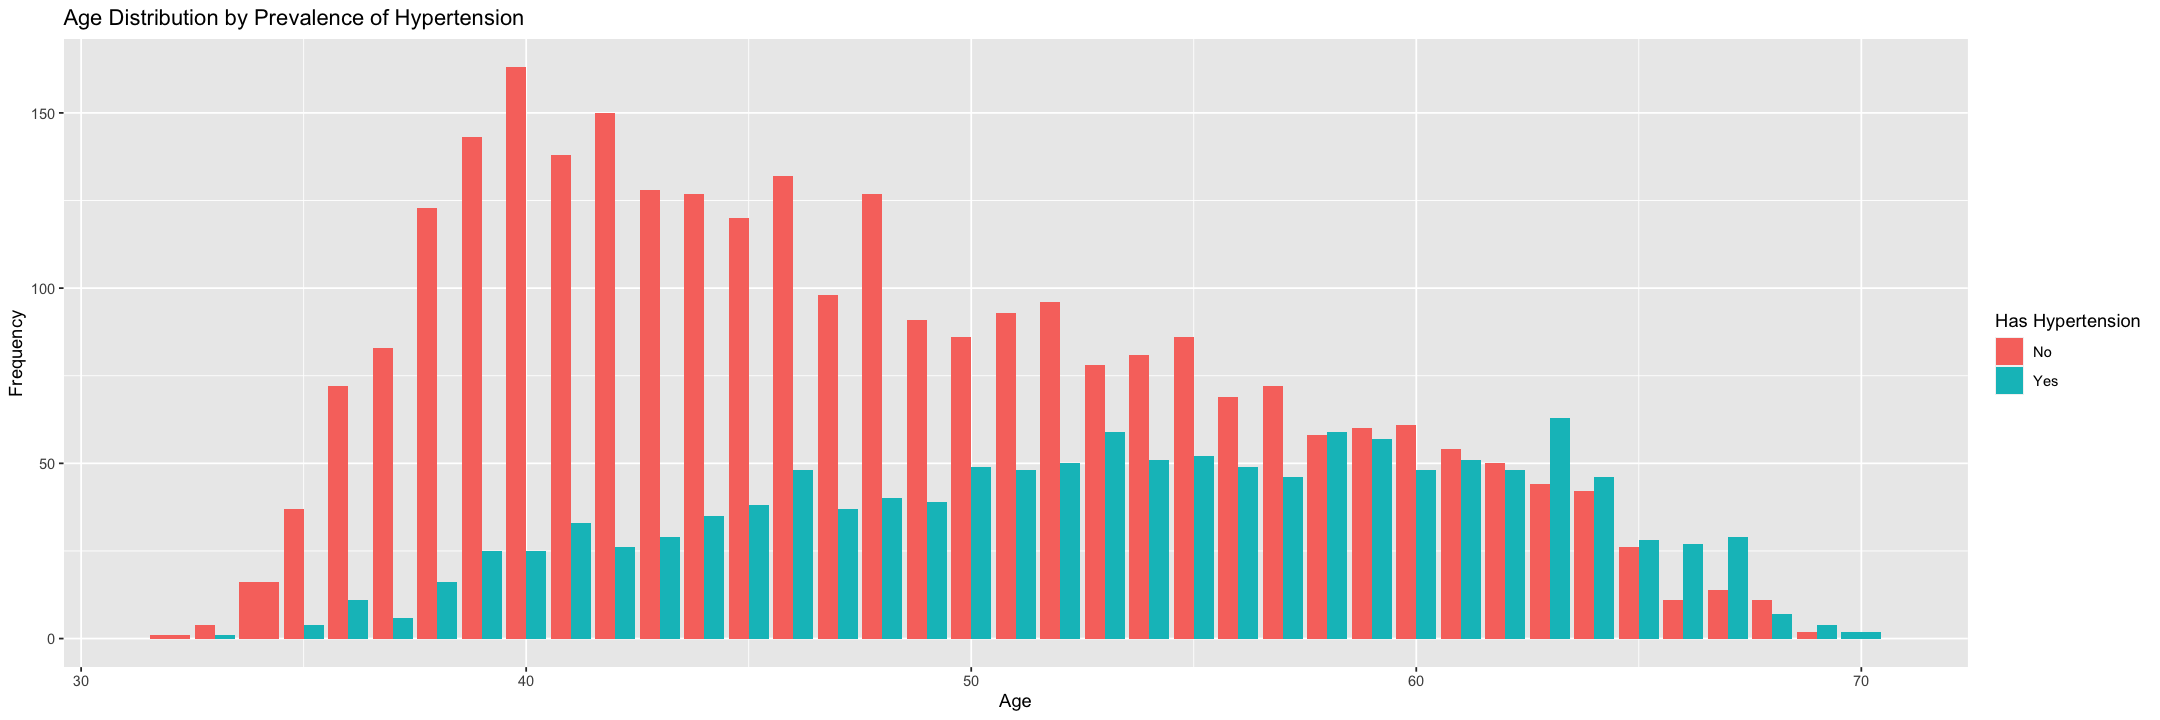

In [6]:
options(repr.plot.width=18, repr.plot.height=6)
ggplot(data = kgheart) + geom_bar(mapping = aes(x = age, fill = as.factor(prevalentHyp)), position = "dodge") + 
  ggtitle("Age Distribution by Prevalence of Hypertension") +
  xlab("Age") +
  ylab("Frequency") + scale_fill_discrete(name = "Has Hypertension", , labels = c("No", "Yes"))

**_There are more people under age 57 that don't have hypertension than people that do, after which point the number of people with and without hypertension are evenly split_**

### 7. Age Distribution By Prevalence of Diabetes

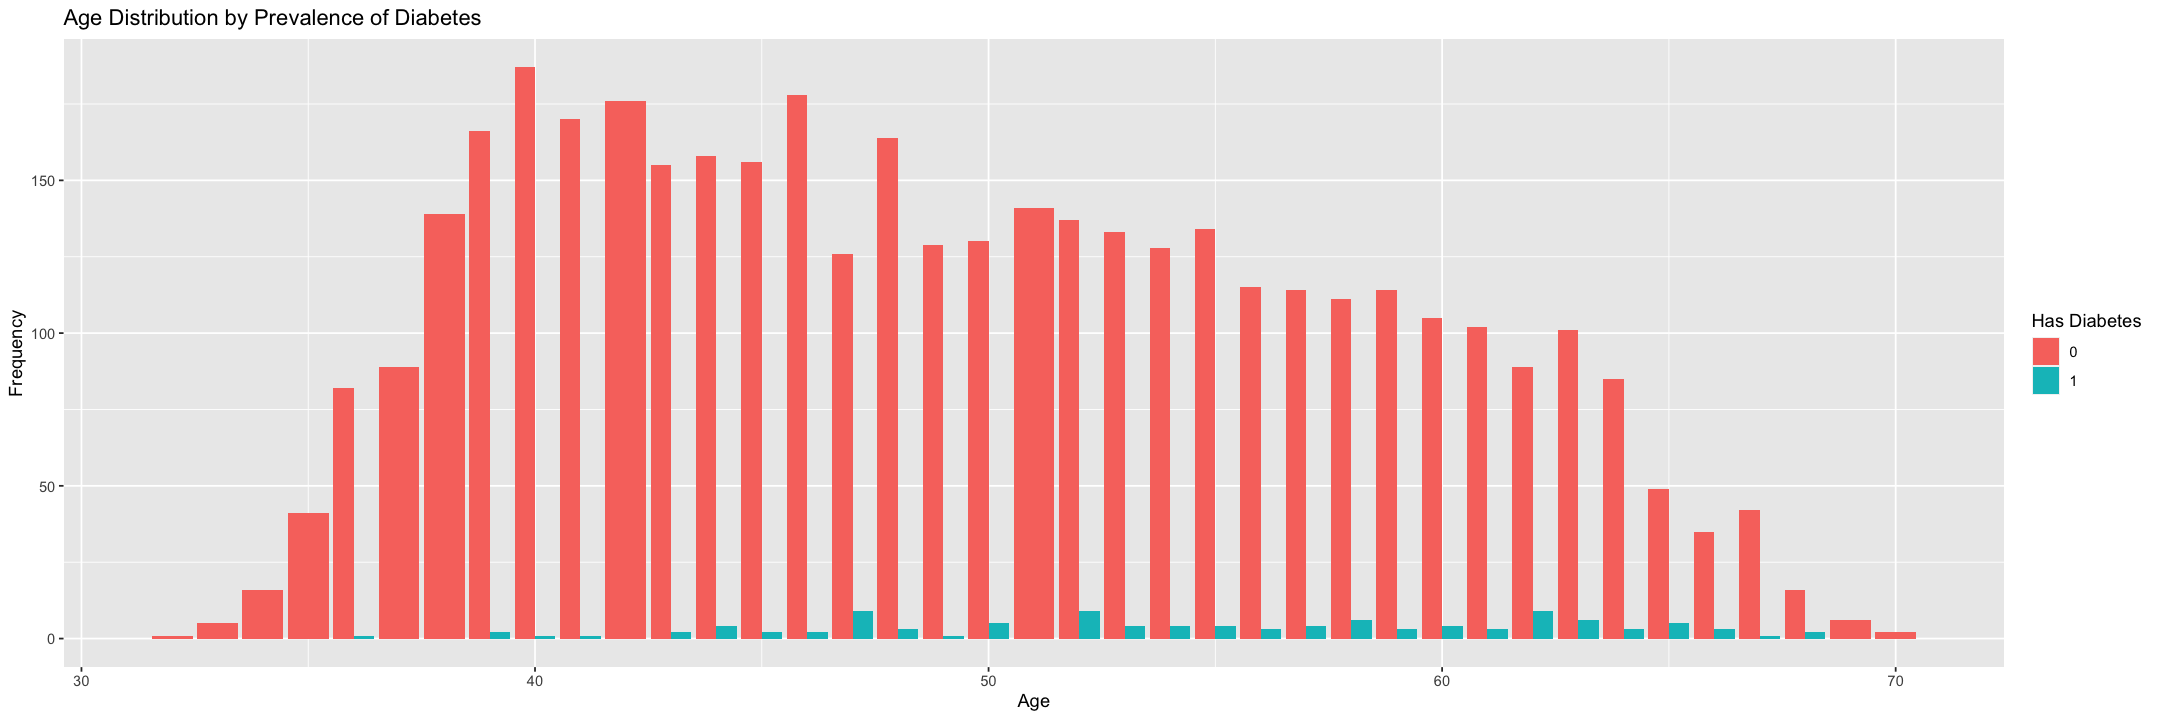

In [7]:
options(repr.plot.width=18, repr.plot.height=6)
ggplot(data = kgheart) + geom_bar(mapping = aes(x = age, fill = as.factor(diabetes)), position = "dodge") + 
  ggtitle("Age Distribution by Prevalence of Diabetes") +
  xlab("Age") +
  ylab("Frequency") + scale_fill_discrete(name = "Has Diabetes")

**_The large majority of people are not diabetic across all age groups, which provides little insight on the impact of diabetes in the risk for CHD._**

### 8. Age Distribution for BMI

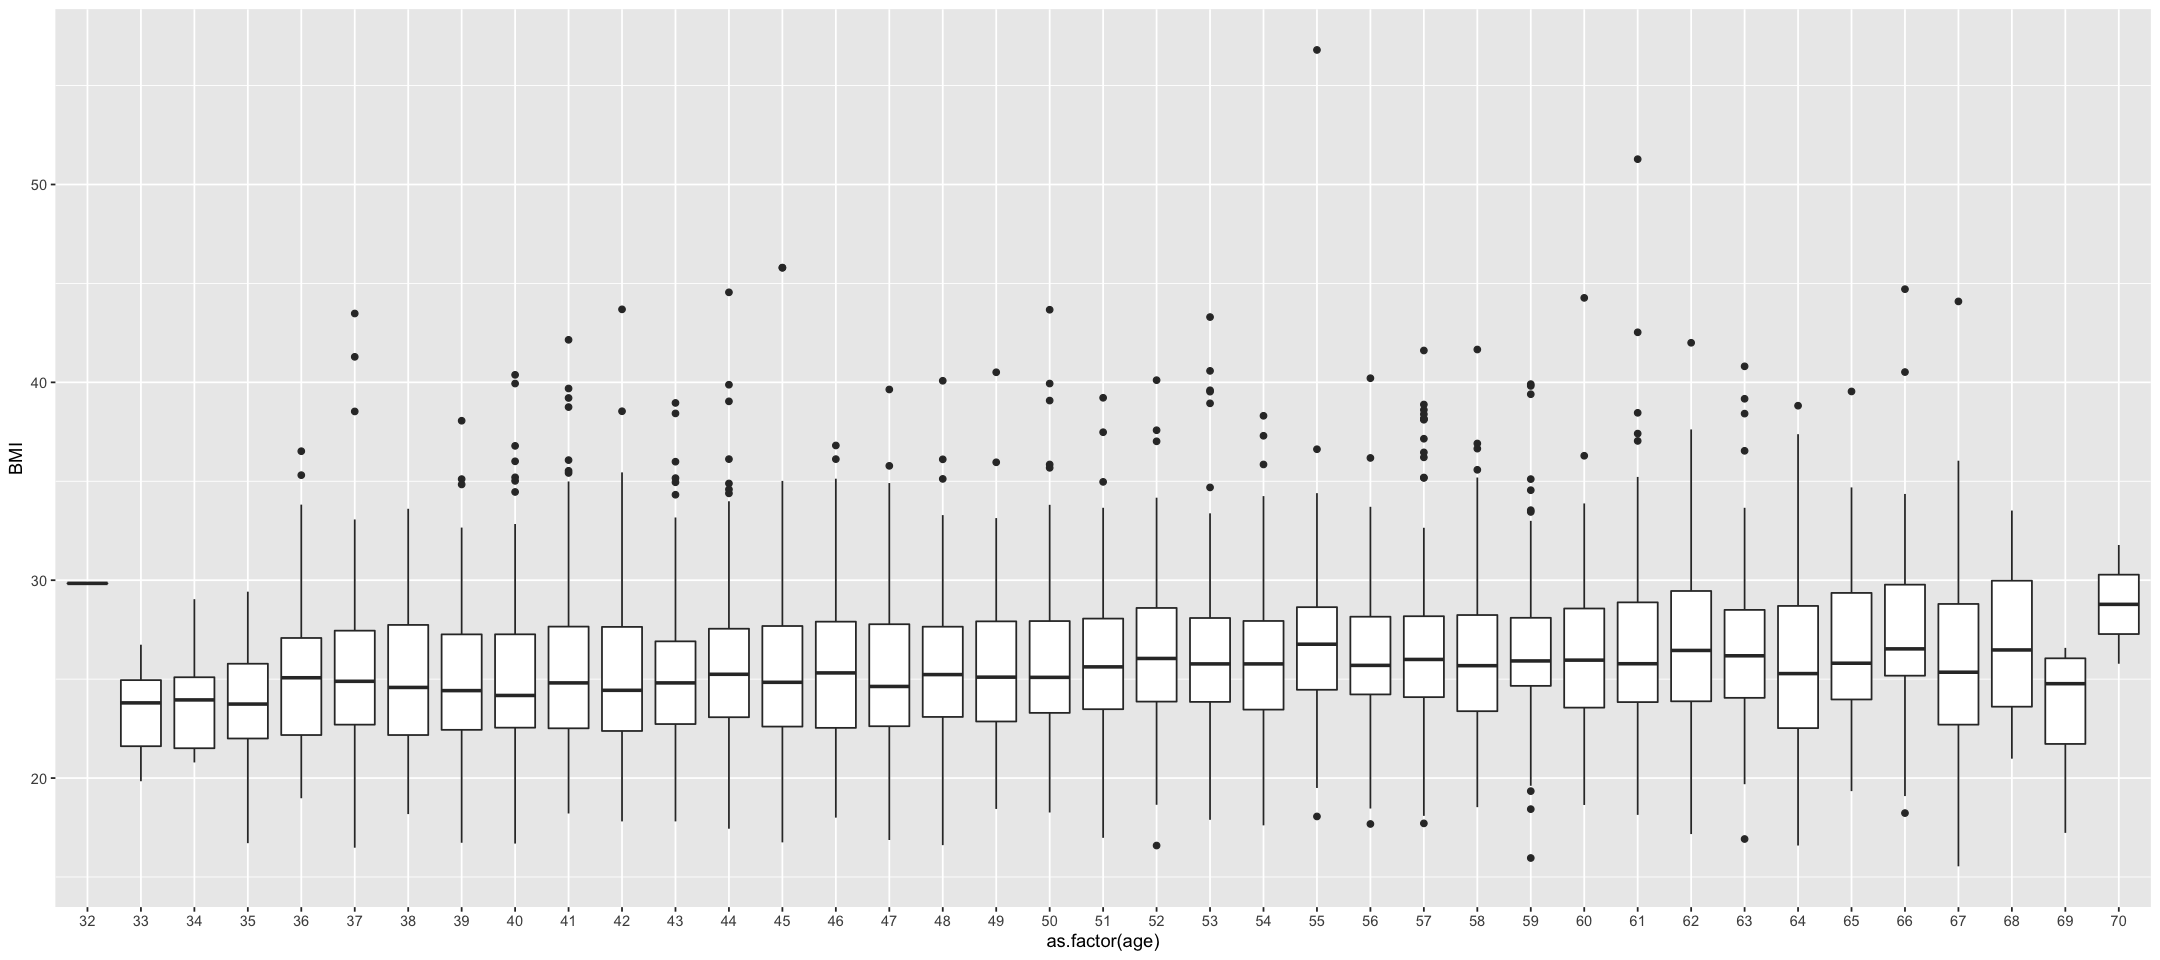

In [9]:
options(repr.plot.width=18, repr.plot.height=8)
ggplot(kgheart, aes(x = as.factor(age), y = BMI)) + geom_boxplot()

__*BMI is evenly distributed across all ages, which implies that there is no relationship between age and BMI*__

## BMI

### 1. Histogram

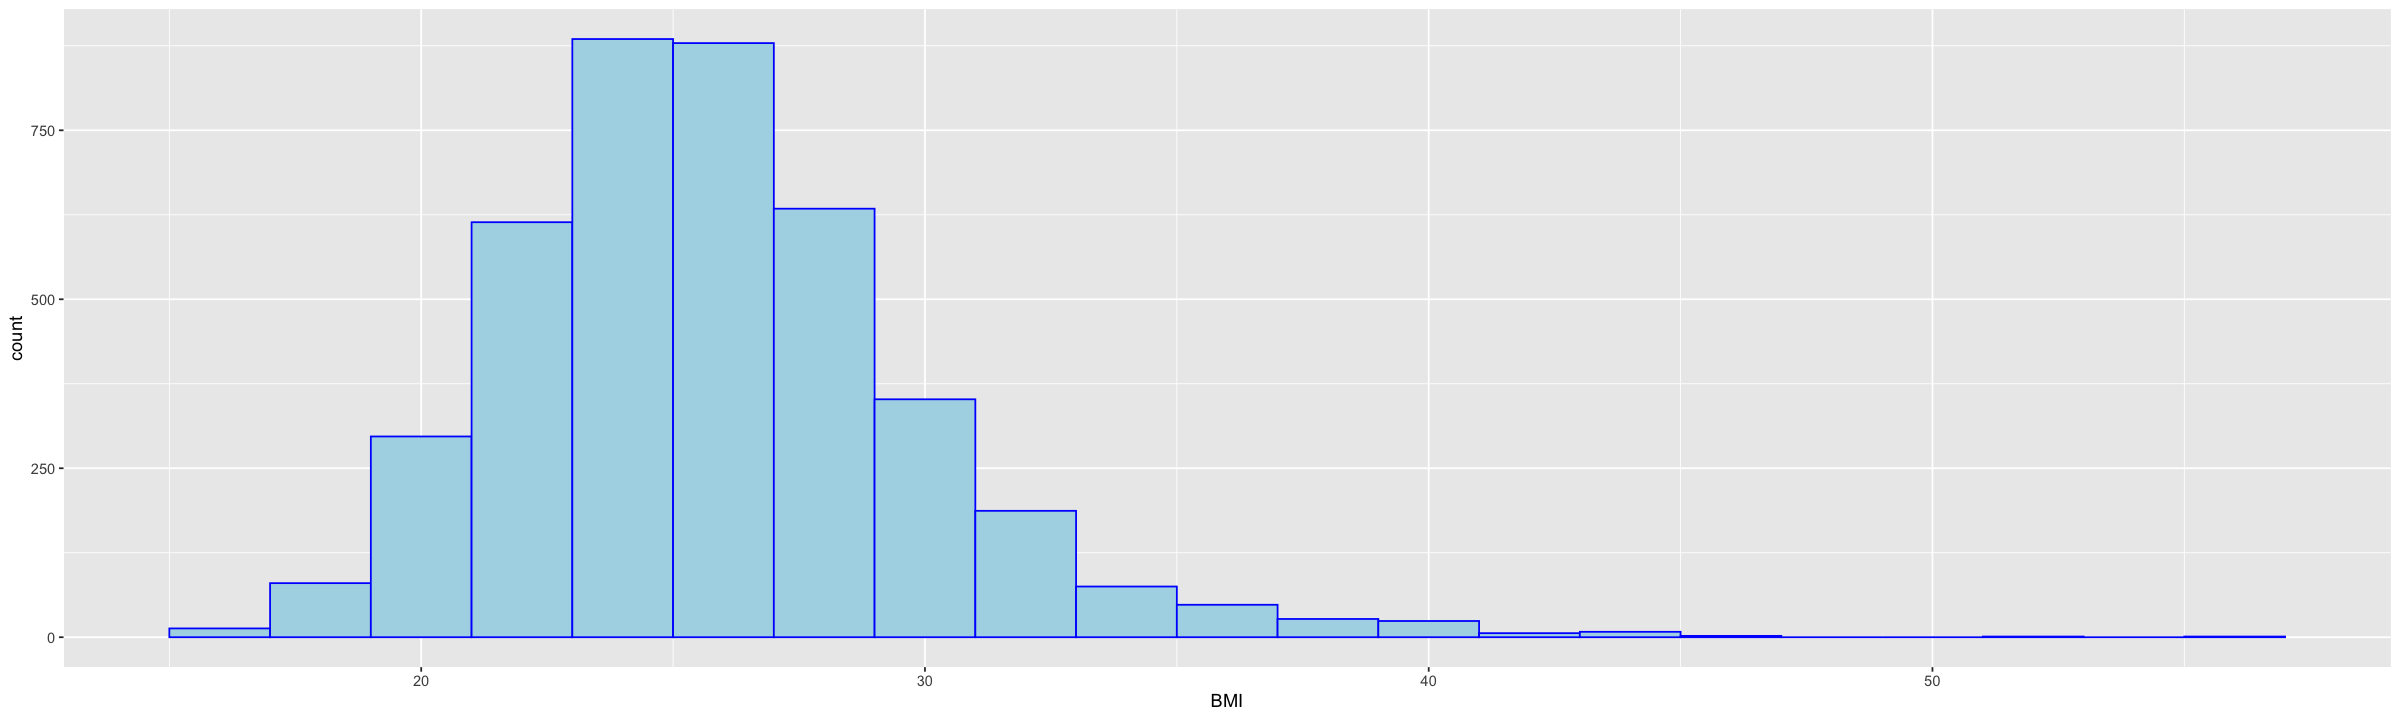

In [6]:
ggplot(data = kgheart, aes(x = BMI)) + geom_histogram(binwidth = 2, fill='lightblue', color = "blue")

**_BMI is approximately normally disptributed in this dataset_**

### 2. BMI Distribution by Prevalence of Stroke

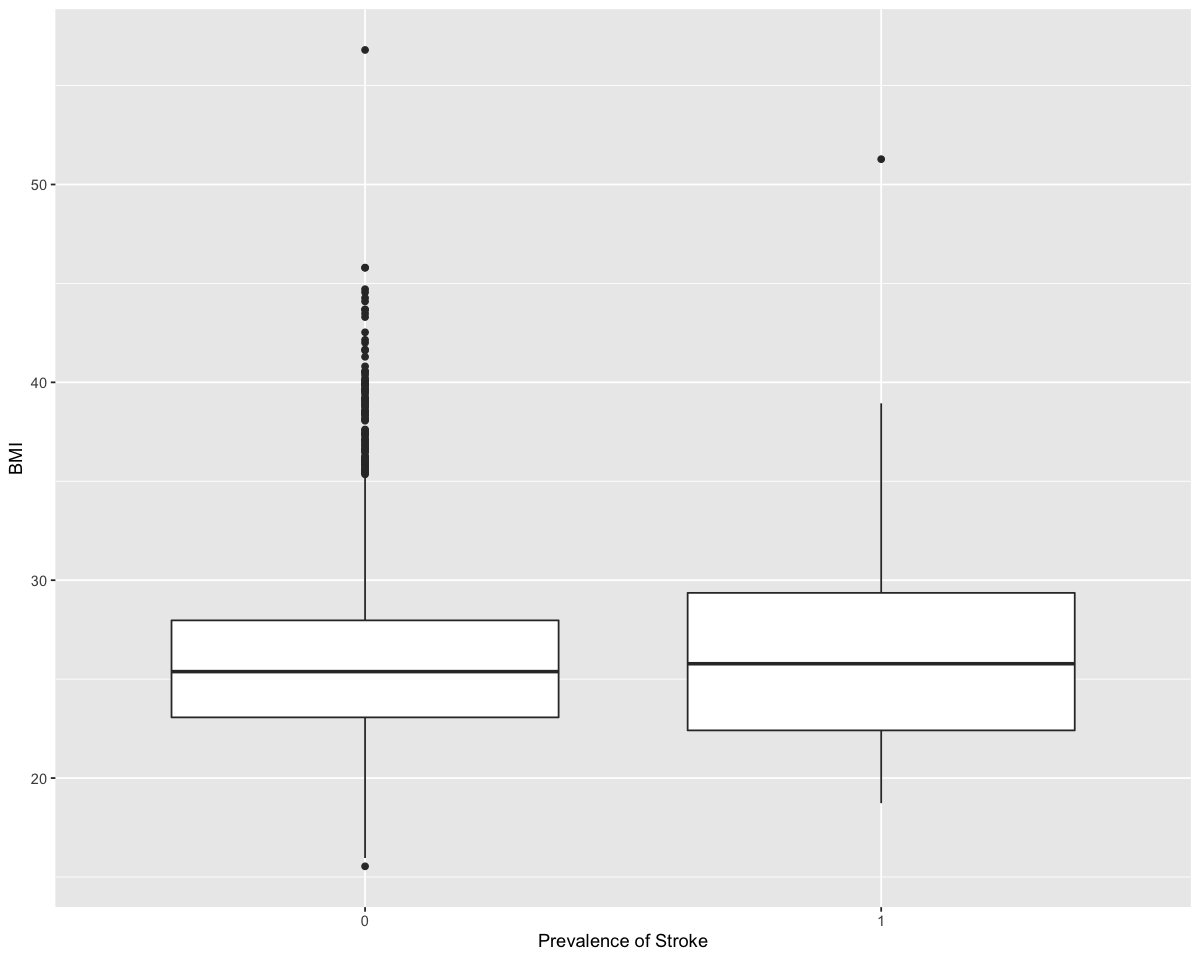

In [19]:
options(repr.plot.width=10, repr.plot.height=8)
ggplot(kgheart, aes(x = as.factor(prevalentStroke), y = BMI)) + geom_boxplot() + labs(x = "Prevalence of Stroke", y = "BMI")

**_BMI does not vary significantly between people who had a stroke and people who didn't have a stroke_**

### 3. BMI Distribution by Prevalence of Hypertension

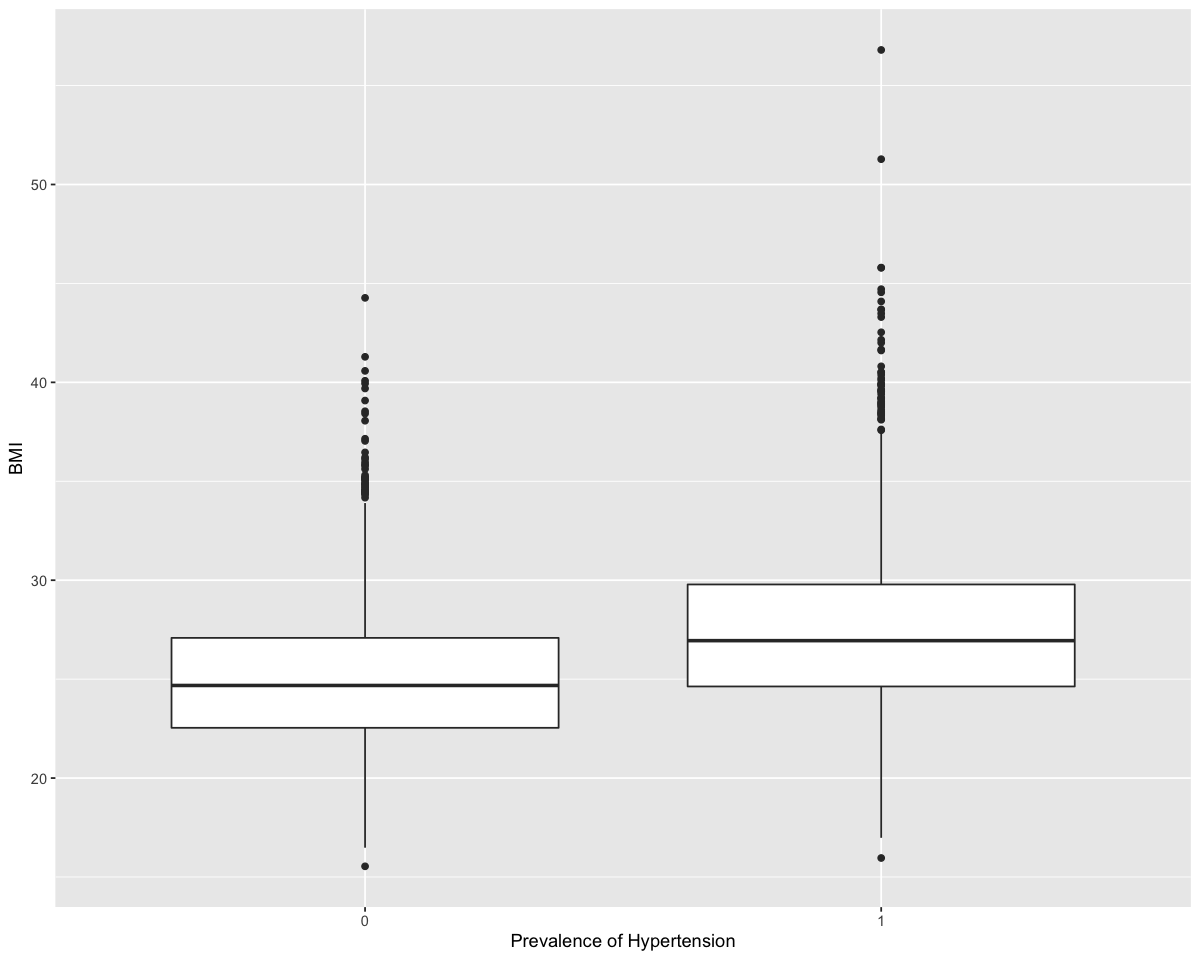

In [20]:
options(repr.plot.width=10, repr.plot.height=8)
ggplot(kgheart, aes(x = as.factor(prevalentHyp), y = BMI)) + geom_boxplot() + labs(x = "Prevalence of Hypertension", y = "BMI")

**_BMI seems to be slightly higher for people with high blood pressure_**

### 4. BMI Distribution by Prevalence of Diabetes

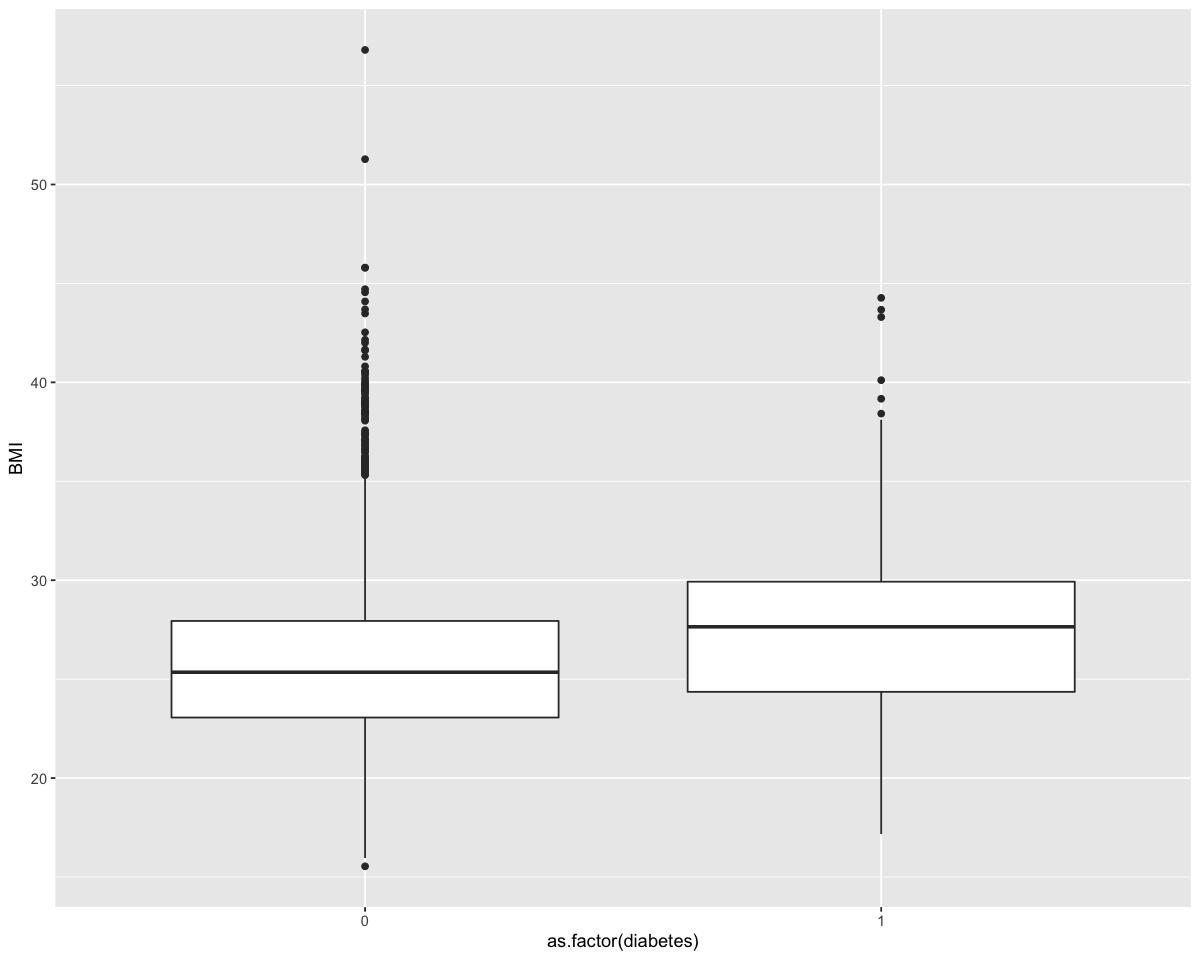

In [12]:
options(repr.plot.width=10, repr.plot.height=8)
ggplot(kgheart, aes(x = as.factor(diabetes), y = BMI)) + geom_boxplot()

**_BMI seems to be higher for people with diabetes_**

### 5. BMI Distribution by Risk of Coranary Heart Disease

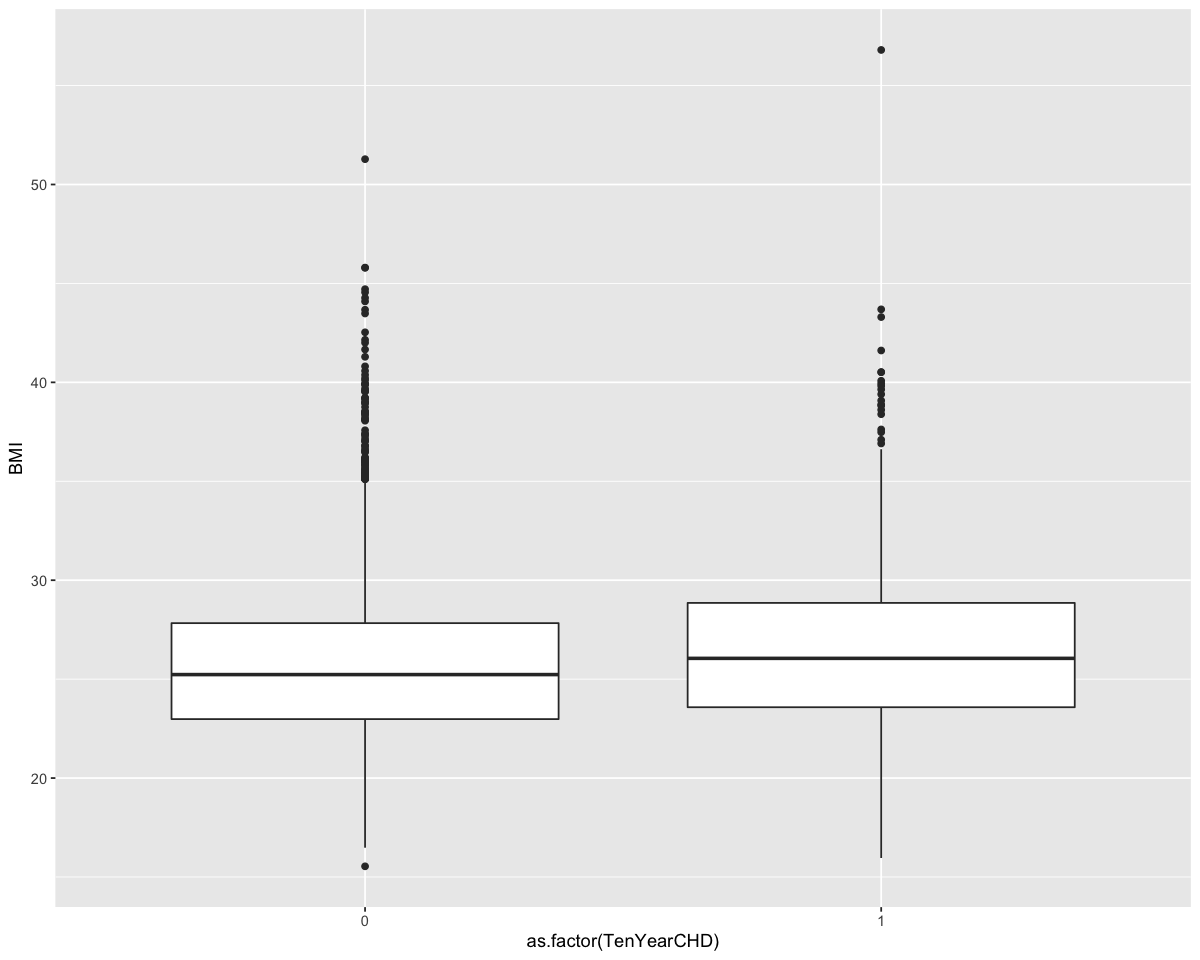

In [13]:
options(repr.plot.width=10, repr.plot.height=8)
ggplot(kgheart, aes(x = as.factor(TenYearCHD), y = BMI)) + geom_boxplot()

**_BMI seems to be slightly higher for people with a 10-year risk of CVD_**

## Gender

In [14]:
count(kgheart, male)

male,n
<int>,<int>
0,2367
1,1766


__*57.3% of the individuals in this dataset are female and 42.7% are male*__

### 1. Education by Gender

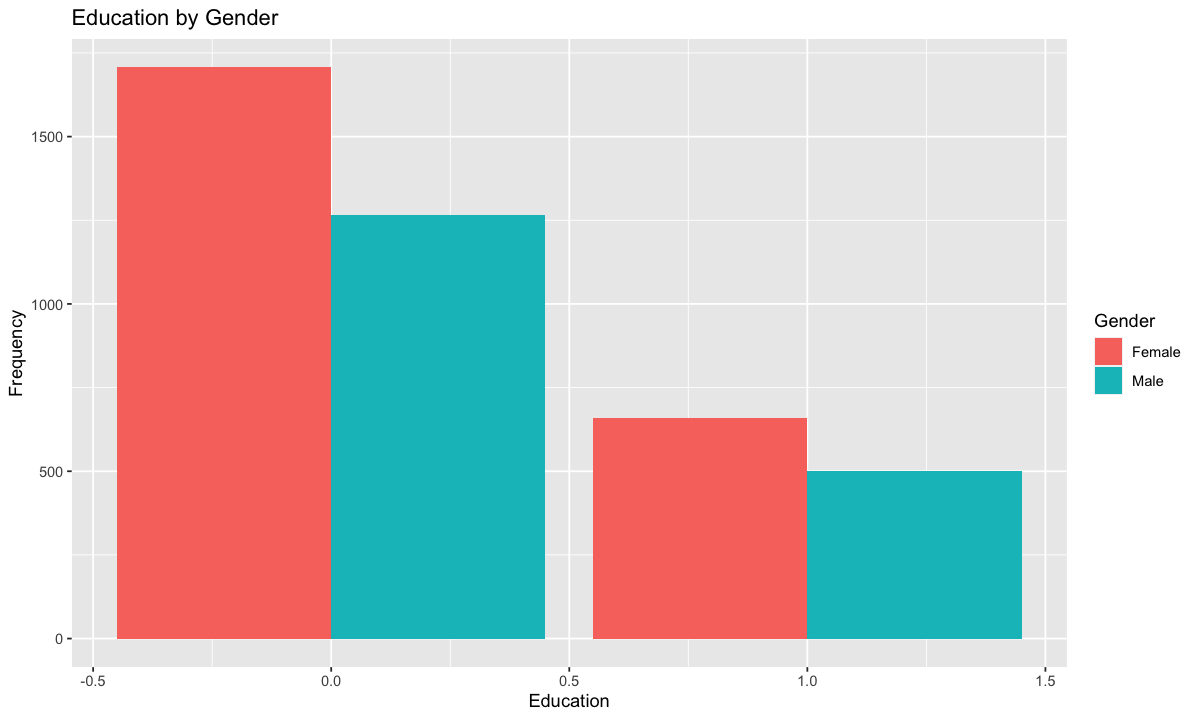

In [15]:
options(repr.plot.width=10, repr.plot.height=6)
ggplot(data = kgheart) + geom_bar(mapping = aes(x = education, fill = as.factor(male)), position = "dodge") + 
  ggtitle("Education by Gender") +
  xlab("Education") +
  ylab("Frequency") + scale_fill_discrete(name = "Gender", labels = c("Female", "Male"))   

__*This dataset includes significantly more men than women and it seems the education level is proportional between genders*__

### 2. Gender by Smoking Status

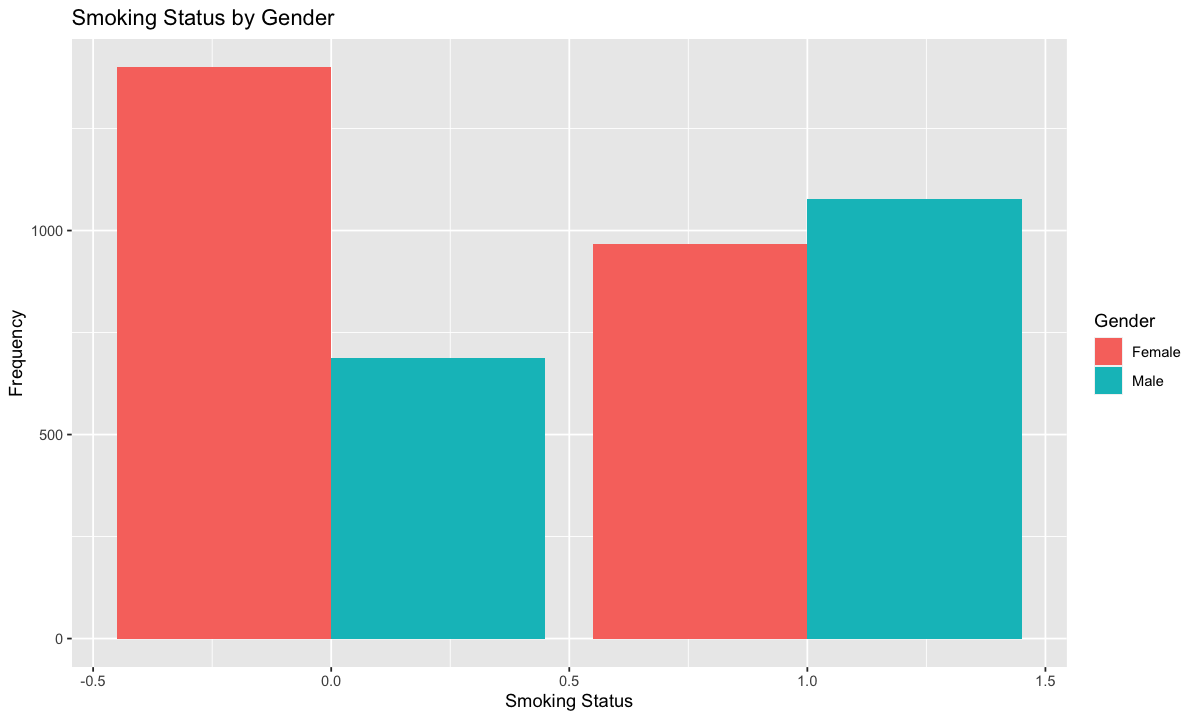

In [16]:
options(repr.plot.width=10, repr.plot.height=6)
ggplot(data = kgheart) + geom_bar(mapping = aes(x = currentSmoker, fill = as.factor(male)), position = "dodge") + 
  ggtitle("Smoking Status by Gender") +
  xlab("Smoking Status") +
  ylab("Frequency") + scale_fill_discrete(name = "Gender", labels = c("Female", "Male"))

__*In this dataset it seems that more men than women are smokers, especially considering the ratio of men to women*__

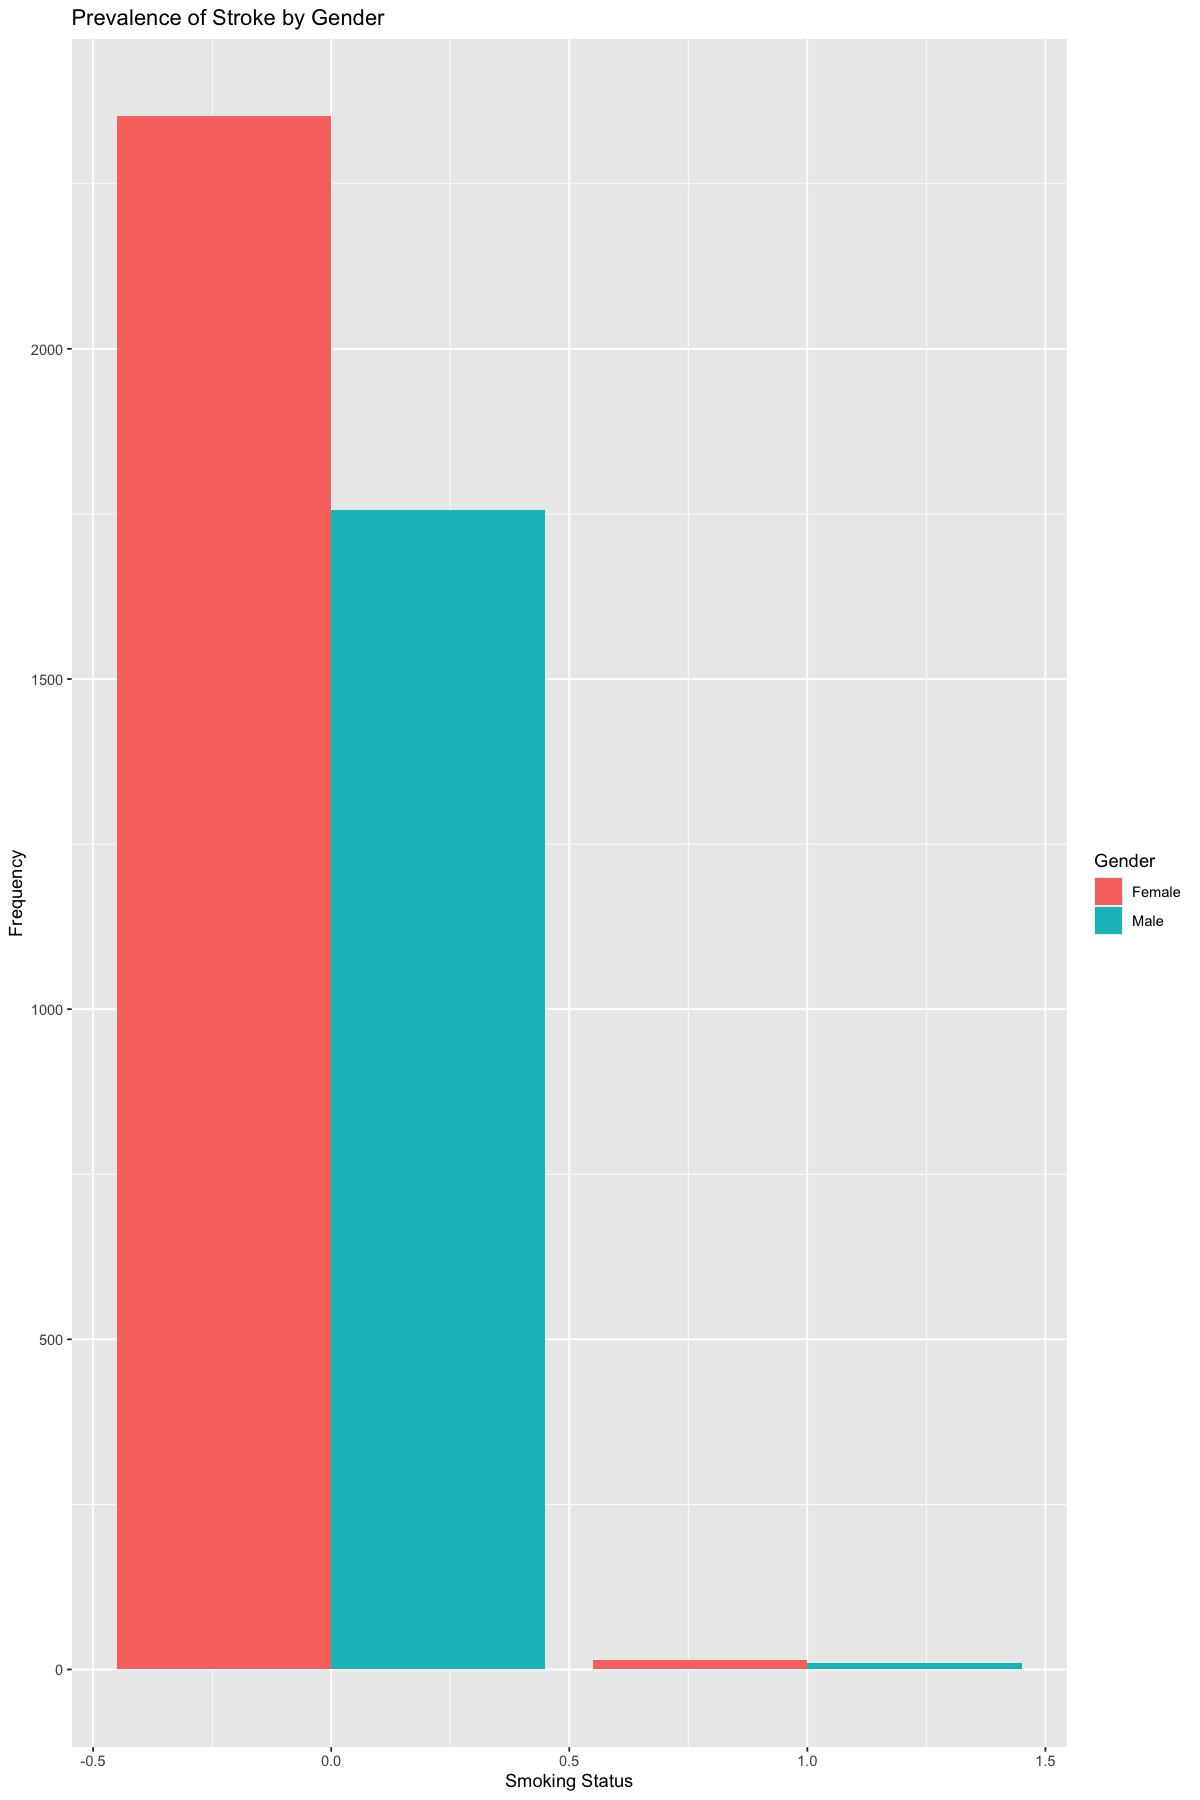

In [17]:
options(repr.plot.width=10, repr.plot.height=15)
ggplot(data = kgheart) + geom_bar(mapping = aes(x = prevalentStroke, fill = as.factor(male)), position = "dodge") + 
  ggtitle("Prevalence of Stroke by Gender") +
  xlab("Smoking Status") +
  ylab("Frequency") + scale_fill_discrete(name = "Gender", labels = c("Female", "Male"))

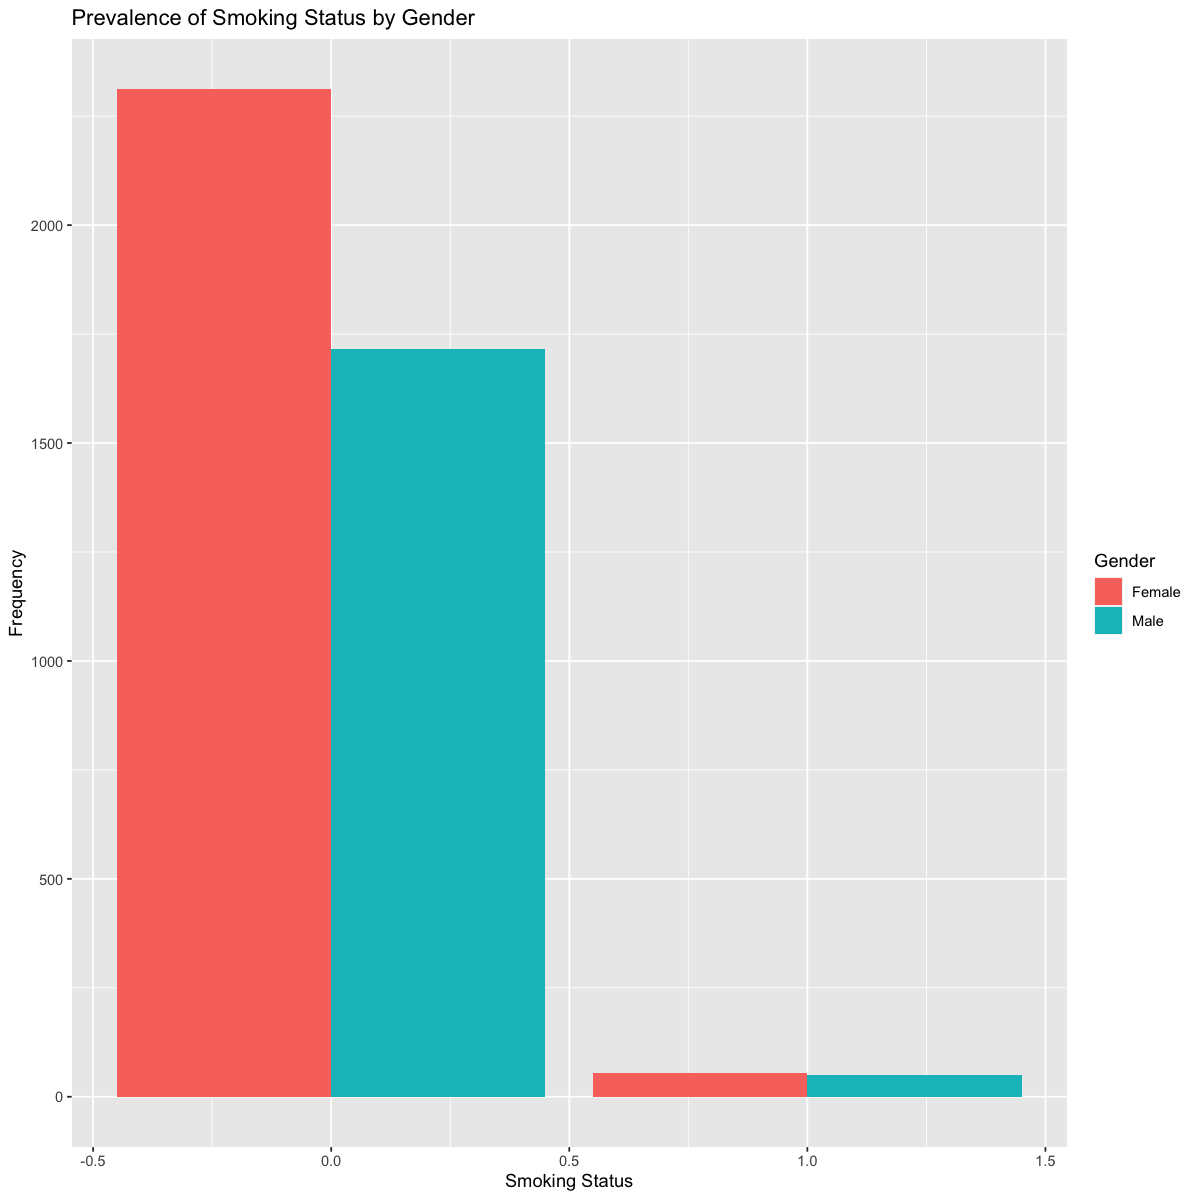

In [22]:
options(repr.plot.width=10, repr.plot.height=10)
ggplot(data = kgheart) + geom_bar(mapping = aes(x = diabetes, fill = as.factor(male)), position = "dodge") + 
  ggtitle("Prevalence of Smoking Status by Gender") +
  xlab("Smoking Status") +
  ylab("Frequency") + scale_fill_discrete(name = "Gender", labels = c("Female", "Male"))

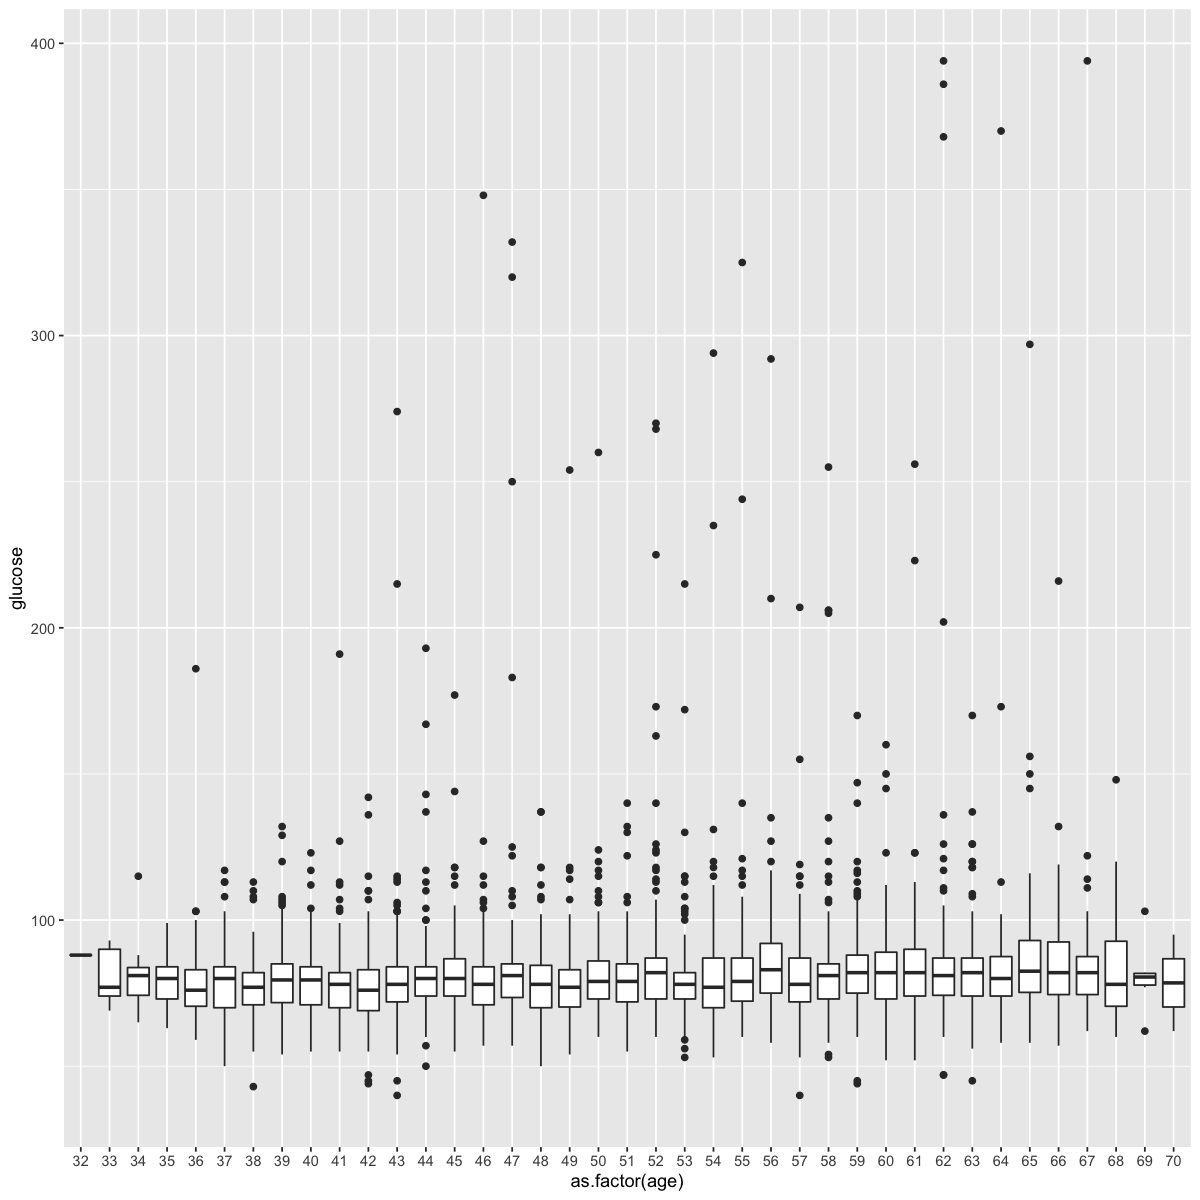

In [19]:
options(repr.plot.width=10, repr.plot.height=10)
ggplot(kgheart, aes(x=as.factor(age), y=glucose)) + geom_boxplot()

# <font color = blue> Statistical Analyses - Categorical IVs </font>
***
## Question setup
### _1. How do demographic and behavioral factors influence the risk for heart disease?_
* DV: __TenYearCHD__, categorical variable with 2 levels
* Categorical IVs: __*Independent Chi-Square*__ - Does the risk for heart disease vary by:
    * Gender (**male**), 2 levels?
    * __education__, 2 levels?
    * __currentSmoker__, 2 levels?
    
### _2. How do health metrics influence a diagnosis of heart disease?_
* DV: __TenYearCHD__, categorical variable with 2 levels
* Categorical IVs: __*Independent Chi-Square*__ - Does the risk for heart disease vary by:
    * __prevalentStroke__, 2 levels?
    * __prevalentHyp__, 2 levels?
    * __diabetes__, 2 levels?


## Load libraries

In [20]:
library(gmodels)

## Independent Chi-Square: __Gender__

In [21]:
CrossTable(kgheart$male, kgheart$TenYearCHD, fisher=TRUE, chisq = TRUE, expected = TRUE, sresid=TRUE, format="SPSS")


   Cell Contents
|-------------------------|
|                   Count |
|         Expected Values |
| Chi-square contribution |
|             Row Percent |
|          Column Percent |
|           Total Percent |
|            Std Residual |
|-------------------------|

Total Observations in Table:  4133 

             | kgheart$TenYearCHD 
kgheart$male |        0  |        1  | Row Total | 
-------------|-----------|-----------|-----------|
           0 |     2069  |      298  |     2367  | 
             | 2007.340  |  359.660  |           | 
             |    1.894  |   10.571  |           | 
             |   87.410% |   12.590% |   57.271% | 
             |   59.030% |   47.452% |           | 
             |   50.060% |    7.210% |           | 
             |    1.376  |   -3.251  |           | 
-------------|-----------|-----------|-----------|
           1 |     1436  |      330  |     1766  | 
             | 1497.660  |  268.340  |           | 
             |    2.539  |   14.169

### 1. Checking Assumptions
* Data is independent, i.e. one observation per subject
* Expected values (frequencies) > 5 - assumption is met 

### 2. Interpretation of the results
* _p_ value  = 6.62189e-08 (<.05)
* The test is significant, meaning that there is a significant difference in the 10 year risk for hear disease between genders

### 3. Post Hoc Analysis and Conclusions
* There are 2 standardized residuals > 2
* There were less women than expected with risk for heart disease
* There were more men than expected with risk for heart disease

### 4. Conclusion
* There is a statistically significant difference in the 10 year risk for heart disease between genders
* According to this data, being a male puts one at a higher risk for cardivascular disease

## Independent Chi-Square: __Education__

In [22]:
CrossTable(kgheart$education, kgheart$TenYearCHD, fisher=TRUE, chisq = TRUE, expected = TRUE, sresid=TRUE, format="SPSS")


   Cell Contents
|-------------------------|
|                   Count |
|         Expected Values |
| Chi-square contribution |
|             Row Percent |
|          Column Percent |
|           Total Percent |
|            Std Residual |
|-------------------------|

Total Observations in Table:  4133 

                  | kgheart$TenYearCHD 
kgheart$education |        0  |        1  | Row Total | 
------------------|-----------|-----------|-----------|
                0 |     2503  |      470  |     2973  | 
                  | 2521.259  |  451.741  |           | 
                  |    0.132  |    0.738  |           | 
                  |   84.191% |   15.809% |   71.933% | 
                  |   71.412% |   74.841% |           | 
                  |   60.561% |   11.372% |           | 
                  |   -0.364  |    0.859  |           | 
------------------|-----------|-----------|-----------|
                1 |     1002  |      158  |     1160  | 
                  |  983.74

### 1. Checking Assumptions
* Data is independent, i.e. one observation per subject
* Expected values (frequencies) > 5 - assumption is met 

### 2. Interpretation of the results
* _p_ value  = 0.07825598 (>.05), so the test is not significant
* According to this data, there seems to be no statistically significant relationship between the risk for heart disease and level of education

## Independent Chi-Square: __Smoking__

In [23]:
CrossTable(kgheart$currentSmoker, kgheart$TenYearCHD, fisher=TRUE, chisq = TRUE, expected = TRUE, sresid=TRUE, format="SPSS")


   Cell Contents
|-------------------------|
|                   Count |
|         Expected Values |
| Chi-square contribution |
|             Row Percent |
|          Column Percent |
|           Total Percent |
|            Std Residual |
|-------------------------|

Total Observations in Table:  4133 

                      | kgheart$TenYearCHD 
kgheart$currentSmoker |        0  |        1  | Row Total | 
----------------------|-----------|-----------|-----------|
                    0 |     1783  |      305  |     2088  | 
                      | 1770.733  |  317.267  |           | 
                      |    0.085  |    0.474  |           | 
                      |   85.393% |   14.607% |   50.520% | 
                      |   50.870% |   48.567% |           | 
                      |   43.141% |    7.380% |           | 
                      |    0.292  |   -0.689  |           | 
----------------------|-----------|-----------|-----------|
                    1 |     1722  |     

### 1. Checking Assumptions
* Data is independent, i.e. one observation per subject
* Expected values (frequencies) > 5 - assumption is met 

### 2. Interpretation of the results
* _p_ value  = 0.2877119 (>.05), so the test is not significant
* According to this data, there seems to be no statistically significant relationship between being a smoker or not and having risk for heart disease
* Please note that this has been proven to be scientifically incorrect, however the connection is not immedicately apparent in this data
*********state source of smoking statement: https://www.cdc.gov/tobacco/campaign/tips/diseases/heart-disease-stroke.html

# <font color = blue> __Statistical Analyses - Continuous Variables__ </font>
***
### 1. How do demographic and behavioral factors influence the risk for heart disease?

* DV: __TenYearCHD__, categorical variable with 2 levels
* Continuous IVs: __*Stepwise Binary Logistic Regression*__ - How do the following influence the risk for heart disease, and how much does each influence it?
    * __age__
    * __cigsPerDay__
    
### 2. How do health metrics influence a diagnosis of heart disease?
* DV: __TenYearCHD__, categorical variable with 2 levels
* Continuous IVs: __*Stepwise Binary Logistic Regression*__ - How do the following influence the risk for heart disease, and how much does each influence it?
    * __totChol__
    * __sysBP__
    * __diaBP__
    * __BMI__
    * __heartRate__
    * __glucose__
    
### _3. Data wrangling note:_
* DV must be recoded to 0/1s (not necessary in this case)

### Load libraries

In [71]:
library("caret")
library("MASS")

### Data Wrangling: Subset data to variables of interest

In [93]:
keep = c('age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD')
logitdf = kgheart[keep]

## Sample Size Assumption

### Running the basic logistic model for each of the variables

In [94]:
mylogit_age = glm(TenYearCHD ~ age, data=logitdf, family="binomial")
mylogit_cigsPerDay = glm(TenYearCHD ~ cigsPerDay, data=logitdf, family="binomial")
mylogit_totChol = glm(TenYearCHD ~ totChol, data=logitdf, family="binomial")
mylogit_sysBP = glm(TenYearCHD ~ sysBP, data=logitdf, family="binomial")
mylogit_diaBP = glm(TenYearCHD ~ diaBP, data=logitdf, family="binomial")
mylogit_BMI = glm(TenYearCHD ~ BMI, data=logitdf, family="binomial")
mylogit_heartRate = glm(TenYearCHD ~ heartRate, data=logitdf, family="binomial")
mylogit_glucose = glm(TenYearCHD ~ glucose, data=logitdf, family="binomial")

### Predict risk for heart disease

In [95]:
probabilities_age = predict(mylogit_age, type = "response")
logitdf$Predicted_age = ifelse(probabilities_age > .5, 1, 0)

probabilities_cigsPerDay = predict(mylogit_cigsPerDay, type = "response")
logitdf$Predicted_cigsPerDay <- ifelse(probabilities_cigsPerDay > .5, 1, 0)

probabilities_totChol = predict(mylogit_totChol, type = "response")
logitdf$Predicted_totChol <- ifelse(probabilities_totChol > .5, 1, 0)

probabilities_sysBP = predict(mylogit_sysBP, type = "response")
logitdf$Predicted_sysBP <- ifelse(probabilities_sysBP > .5, 1, 0)

probabilities_diaBP = predict(mylogit_diaBP, type = "response")
logitdf$Predicted_diaBP <- ifelse(probabilities_diaBP > .5, 1, 0)

probabilities_BMI = predict(mylogit_BMI, type = "response")
logitdf$Predicted_BMI <- ifelse(probabilities_BMI > .5, 1, 0)

probabilities_heartRate = predict(mylogit_heartRate, type = "response")
logitdf$Predicted_heartRate <- ifelse(probabilities_heartRate > .5, 1, 0)

probabilities_glucose = predict(mylogit_glucose, type = "response")
logitdf$Predicted_glucose <- ifelse(probabilities_glucose > .5, 1, 0)

### Create confusion matrices

In [103]:
conf_mat_Predicted_age <- caret::confusionMatrix(as.factor(logitdf$Predicted_age), as.factor(logitdf$TenYearCHD))
conf_mat_Predicted_age

Warning message in confusionMatrix.default(as.factor(logitdf$Predicted_age), as.factor(logitdf$TenYearCHD)):
“Levels are not in the same order for reference and data. Refactoring data to match.”


Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 3505  628
         1    0    0
                                          
               Accuracy : 0.8481          
                 95% CI : (0.8367, 0.8589)
    No Information Rate : 0.8481          
    P-Value [Acc > NIR] : 0.5106          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 1.0000          
            Specificity : 0.0000          
         Pos Pred Value : 0.8481          
         Neg Pred Value :    NaN          
             Prevalence : 0.8481          
         Detection Rate : 0.8481          
   Detection Prevalence : 1.0000          
      Balanced Accuracy : 0.5000          
                                          
       'Positive' Class : 0               
                        

In [104]:
conf_mat_Predicted_cigsPerDay <- caret::confusionMatrix(as.factor(logitdf$Predicted_cigsPerDay), as.factor(logitdf$TenYearCHD))
conf_mat_Predicted_cigsPerDay 

Warning message in confusionMatrix.default(as.factor(logitdf$Predicted_cigsPerDay), :
“Levels are not in the same order for reference and data. Refactoring data to match.”


Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 3505  628
         1    0    0
                                          
               Accuracy : 0.8481          
                 95% CI : (0.8367, 0.8589)
    No Information Rate : 0.8481          
    P-Value [Acc > NIR] : 0.5106          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 1.0000          
            Specificity : 0.0000          
         Pos Pred Value : 0.8481          
         Neg Pred Value :    NaN          
             Prevalence : 0.8481          
         Detection Rate : 0.8481          
   Detection Prevalence : 1.0000          
      Balanced Accuracy : 0.5000          
                                          
       'Positive' Class : 0               
                        

In [105]:
conf_mat_Predicted_totChol <- caret::confusionMatrix(as.factor(logitdf$Predicted_totChol), as.factor(logitdf$TenYearCHD))
conf_mat_Predicted_totChol 

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 3505  627
         1    0    1
                                         
               Accuracy : 0.8483         
                 95% CI : (0.837, 0.8591)
    No Information Rate : 0.8481         
    P-Value [Acc > NIR] : 0.4934         
                                         
                  Kappa : 0.0027         
                                         
 Mcnemar's Test P-Value : <2e-16         
                                         
            Sensitivity : 1.000000       
            Specificity : 0.001592       
         Pos Pred Value : 0.848258       
         Neg Pred Value : 1.000000       
             Prevalence : 0.848052       
         Detection Rate : 0.848052       
   Detection Prevalence : 0.999758       
      Balanced Accuracy : 0.500796       
                                         
       'Positive' Class : 0              
                                         

In [106]:
conf_mat_Predicted_sysBP <- caret::confusionMatrix(as.factor(logitdf$Predicted_sysBP), as.factor(logitdf$TenYearCHD))
conf_mat_Predicted_sysBP

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 3495  614
         1   10   14
                                          
               Accuracy : 0.849           
                 95% CI : (0.8377, 0.8598)
    No Information Rate : 0.8481          
    P-Value [Acc > NIR] : 0.4417          
                                          
                  Kappa : 0.0321          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.99715         
            Specificity : 0.02229         
         Pos Pred Value : 0.85057         
         Neg Pred Value : 0.58333         
             Prevalence : 0.84805         
         Detection Rate : 0.84563         
   Detection Prevalence : 0.99419         
      Balanced Accuracy : 0.50972         
                                          
       'Positive' Class : 0               
                        

In [107]:
conf_mat_Predicted_diaBP <- caret::confusionMatrix(as.factor(logitdf$Predicted_diaBP), as.factor(logitdf$TenYearCHD))
conf_mat_Predicted_diaBP 

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 3504  627
         1    1    1
                                          
               Accuracy : 0.8481          
                 95% CI : (0.8367, 0.8589)
    No Information Rate : 0.8481          
    P-Value [Acc > NIR] : 0.5106          
                                          
                  Kappa : 0.0022          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.999715        
            Specificity : 0.001592        
         Pos Pred Value : 0.848221        
         Neg Pred Value : 0.500000        
             Prevalence : 0.848052        
         Detection Rate : 0.847810        
   Detection Prevalence : 0.999516        
      Balanced Accuracy : 0.500654        
                                          
       'Positive' Class : 0               
                        

In [108]:
conf_mat_Predicted_BMI <- caret::confusionMatrix(as.factor(logitdf$Predicted_BMI), as.factor(logitdf$TenYearCHD))
conf_mat_Predicted_BMI

Warning message in confusionMatrix.default(as.factor(logitdf$Predicted_BMI), as.factor(logitdf$TenYearCHD)):
“Levels are not in the same order for reference and data. Refactoring data to match.”


Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 3505  628
         1    0    0
                                          
               Accuracy : 0.8481          
                 95% CI : (0.8367, 0.8589)
    No Information Rate : 0.8481          
    P-Value [Acc > NIR] : 0.5106          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 1.0000          
            Specificity : 0.0000          
         Pos Pred Value : 0.8481          
         Neg Pred Value :    NaN          
             Prevalence : 0.8481          
         Detection Rate : 0.8481          
   Detection Prevalence : 1.0000          
      Balanced Accuracy : 0.5000          
                                          
       'Positive' Class : 0               
                        

In [109]:
conf_mat_Predicted_heartRate <- caret::confusionMatrix(as.factor(logitdf$Predicted_heartRate ), as.factor(logitdf$TenYearCHD))
conf_mat_Predicted_heartRate

Warning message in confusionMatrix.default(as.factor(logitdf$Predicted_heartRate), :
“Levels are not in the same order for reference and data. Refactoring data to match.”


Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 3505  628
         1    0    0
                                          
               Accuracy : 0.8481          
                 95% CI : (0.8367, 0.8589)
    No Information Rate : 0.8481          
    P-Value [Acc > NIR] : 0.5106          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 1.0000          
            Specificity : 0.0000          
         Pos Pred Value : 0.8481          
         Neg Pred Value :    NaN          
             Prevalence : 0.8481          
         Detection Rate : 0.8481          
   Detection Prevalence : 1.0000          
      Balanced Accuracy : 0.5000          
                                          
       'Positive' Class : 0               
                        

In [110]:
conf_mat_Predicted_glucose <- caret::confusionMatrix(as.factor(logitdf$Predicted_glucose), as.factor(logitdf$TenYearCHD))
conf_mat_Predicted_glucose

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 3499  614
         1    6   14
                                          
               Accuracy : 0.85            
                 95% CI : (0.8387, 0.8607)
    No Information Rate : 0.8481          
    P-Value [Acc > NIR] : 0.3743          
                                          
                  Kappa : 0.0342          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.99829         
            Specificity : 0.02229         
         Pos Pred Value : 0.85072         
         Neg Pred Value : 0.70000         
             Prevalence : 0.84805         
         Detection Rate : 0.84660         
   Detection Prevalence : 0.99516         
      Balanced Accuracy : 0.51029         
                                          
       'Positive' Class : 0               
                        

*The variables that meet the sample size assumption are __glucose__ and __sysBP__*

## Assumption of Linearity of the Logit

### Creating the predictors vector

In [66]:
predictors = colnames(logitdf)

### Creating the logit

In [67]:
logitdf1 = logitdf %>%
   mutate(logit=log(probabilities/(1-probabilities))) %>%
   gather(key= "predictors", value="predictor.value", -logit)

### Assessing linearity graphically

`geom_smooth()` using formula 'y ~ x'



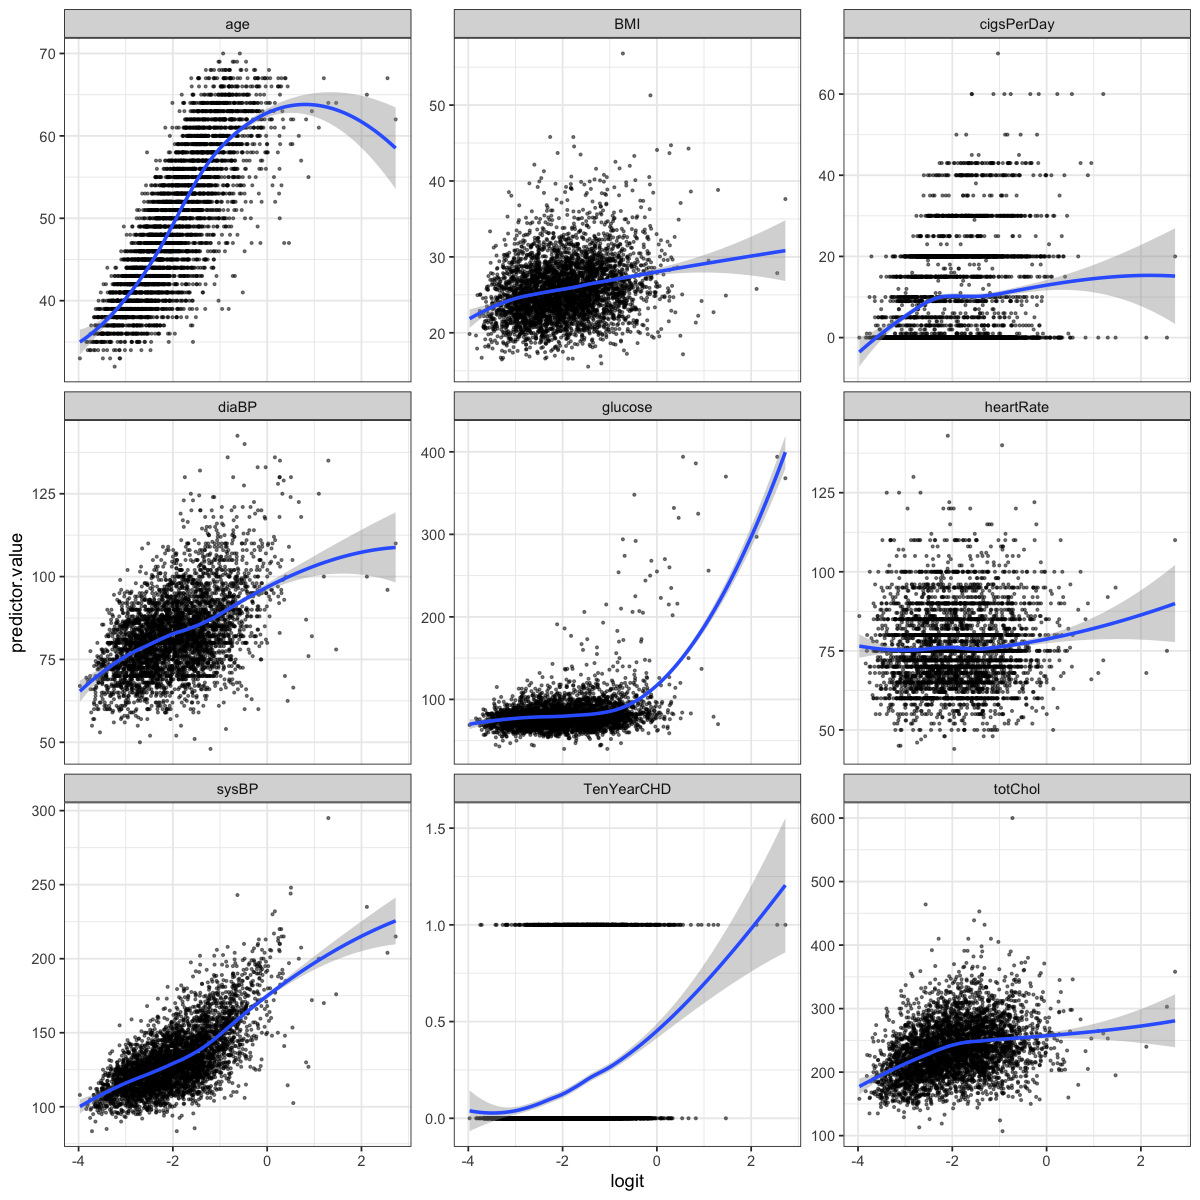

In [68]:
ggplot(logitdf1, aes(logit, predictor.value)) + 
geom_point(size=.5, alpha=.5) + 
geom_smooth(method= "loess")+ 
theme_bw() + 
facet_wrap(~predictors, scales="free_y")

*The variables that meet the linearity of the logit assumption are __BMI__, __cigsPerDay__, __diaBP__, __sysBP__, __heartRate__, and __totChol__. __Age__ and __glucose__ do not meet this assumption*

### Independent Errors Assumption

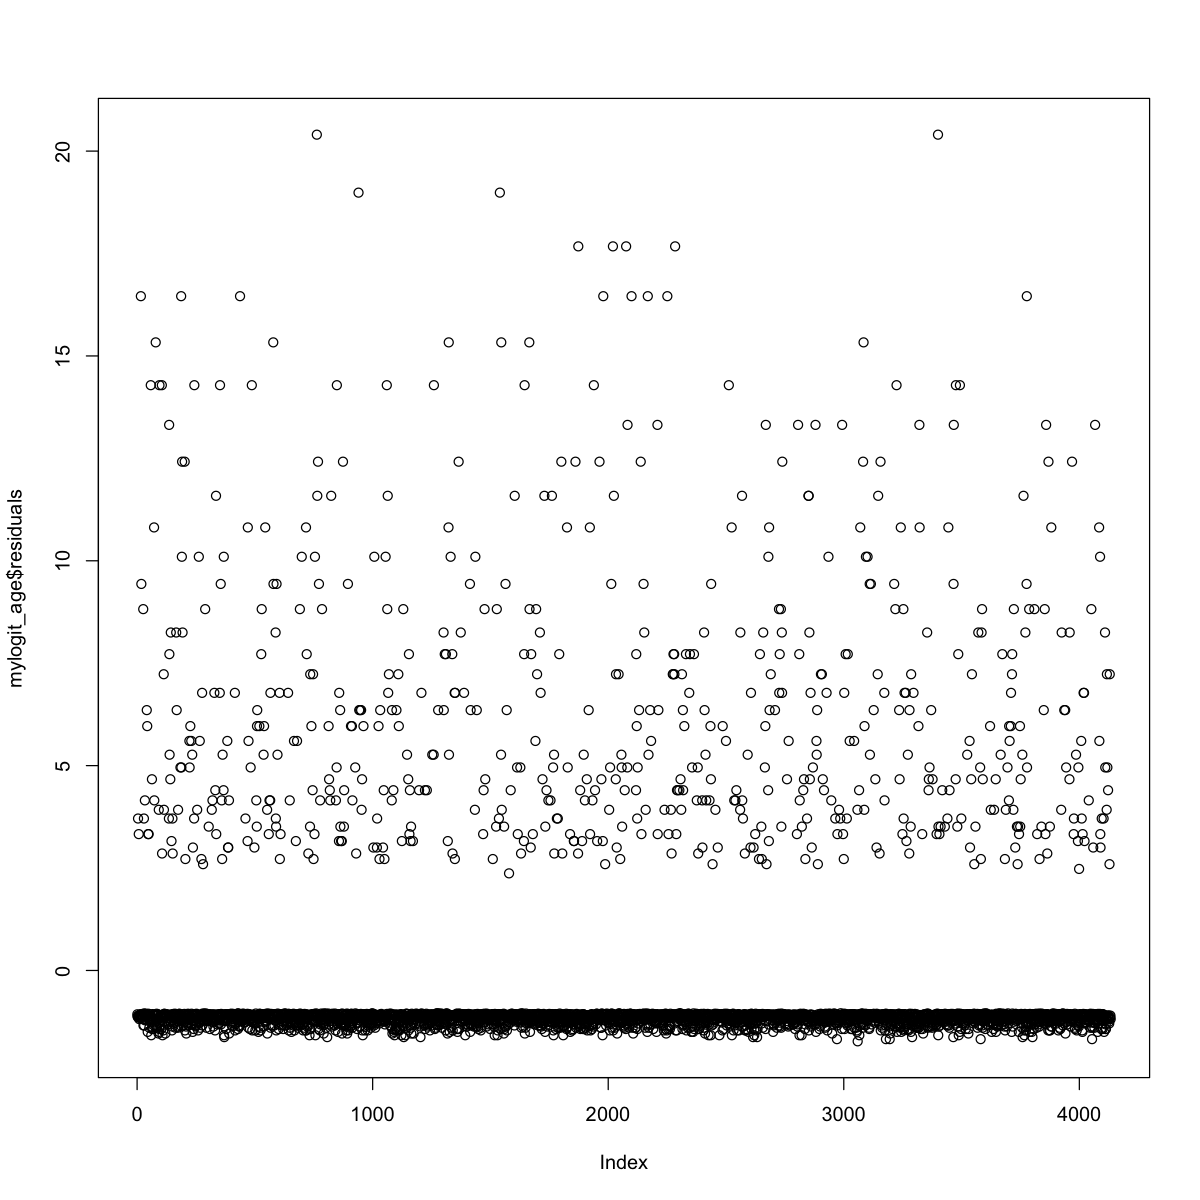

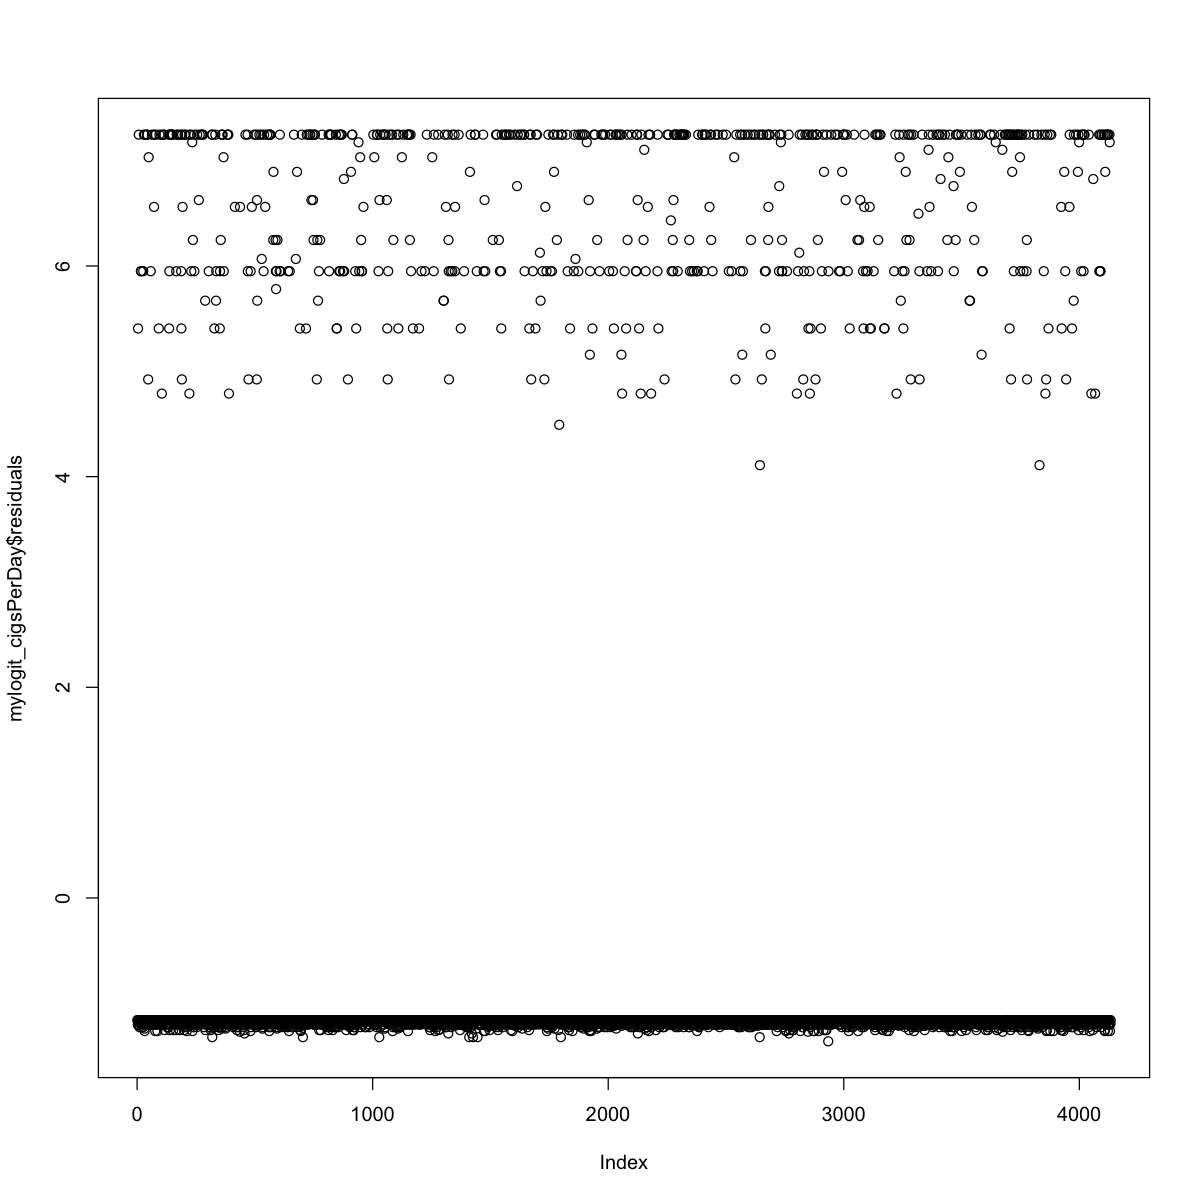

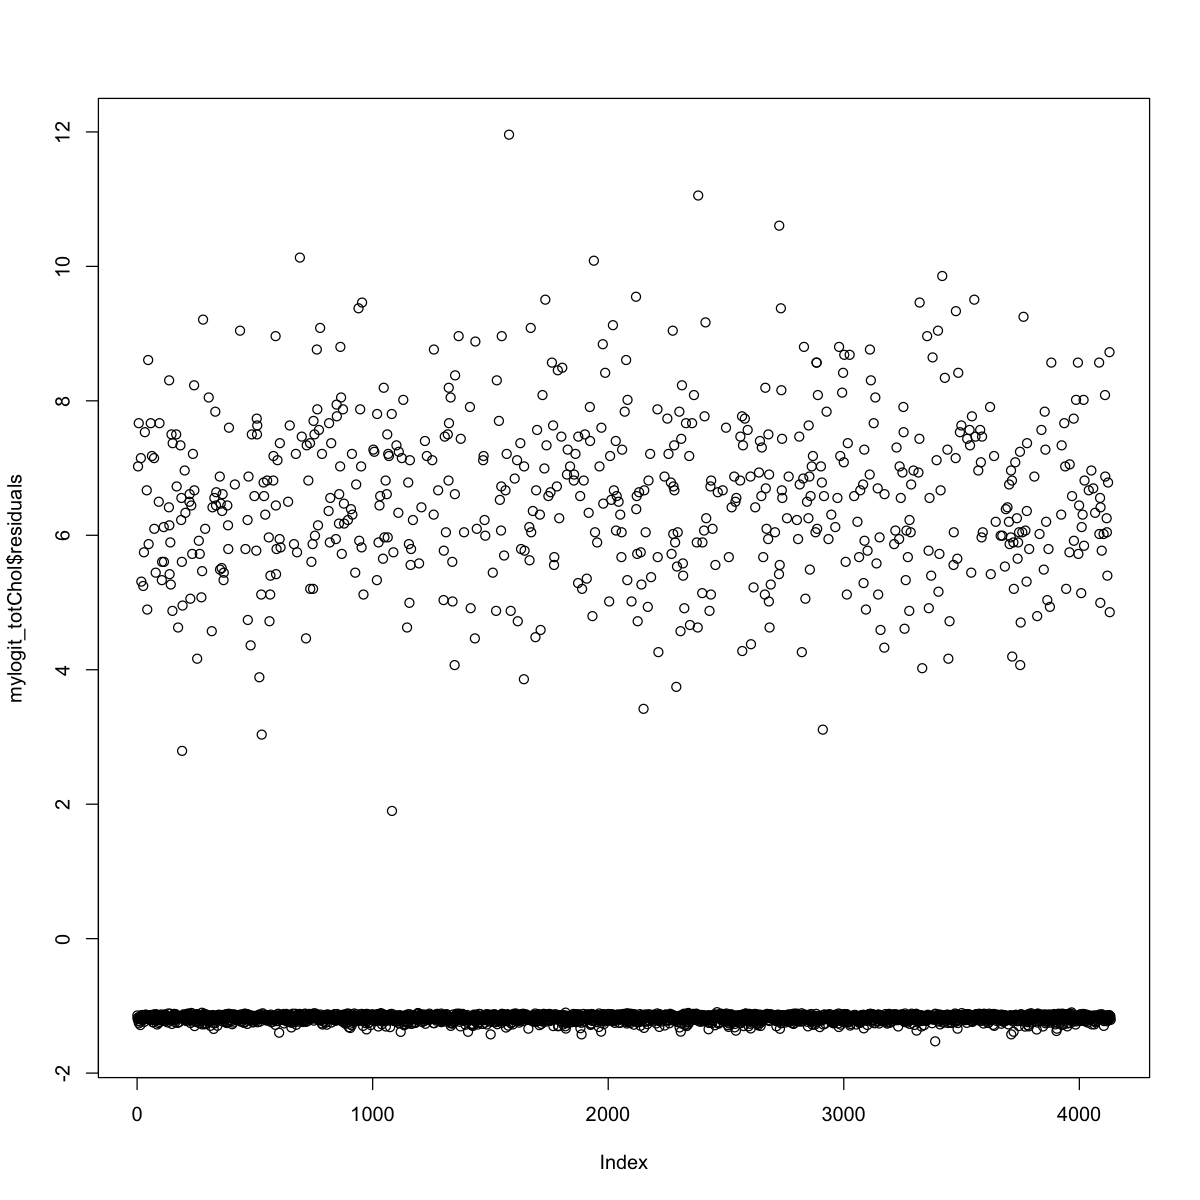

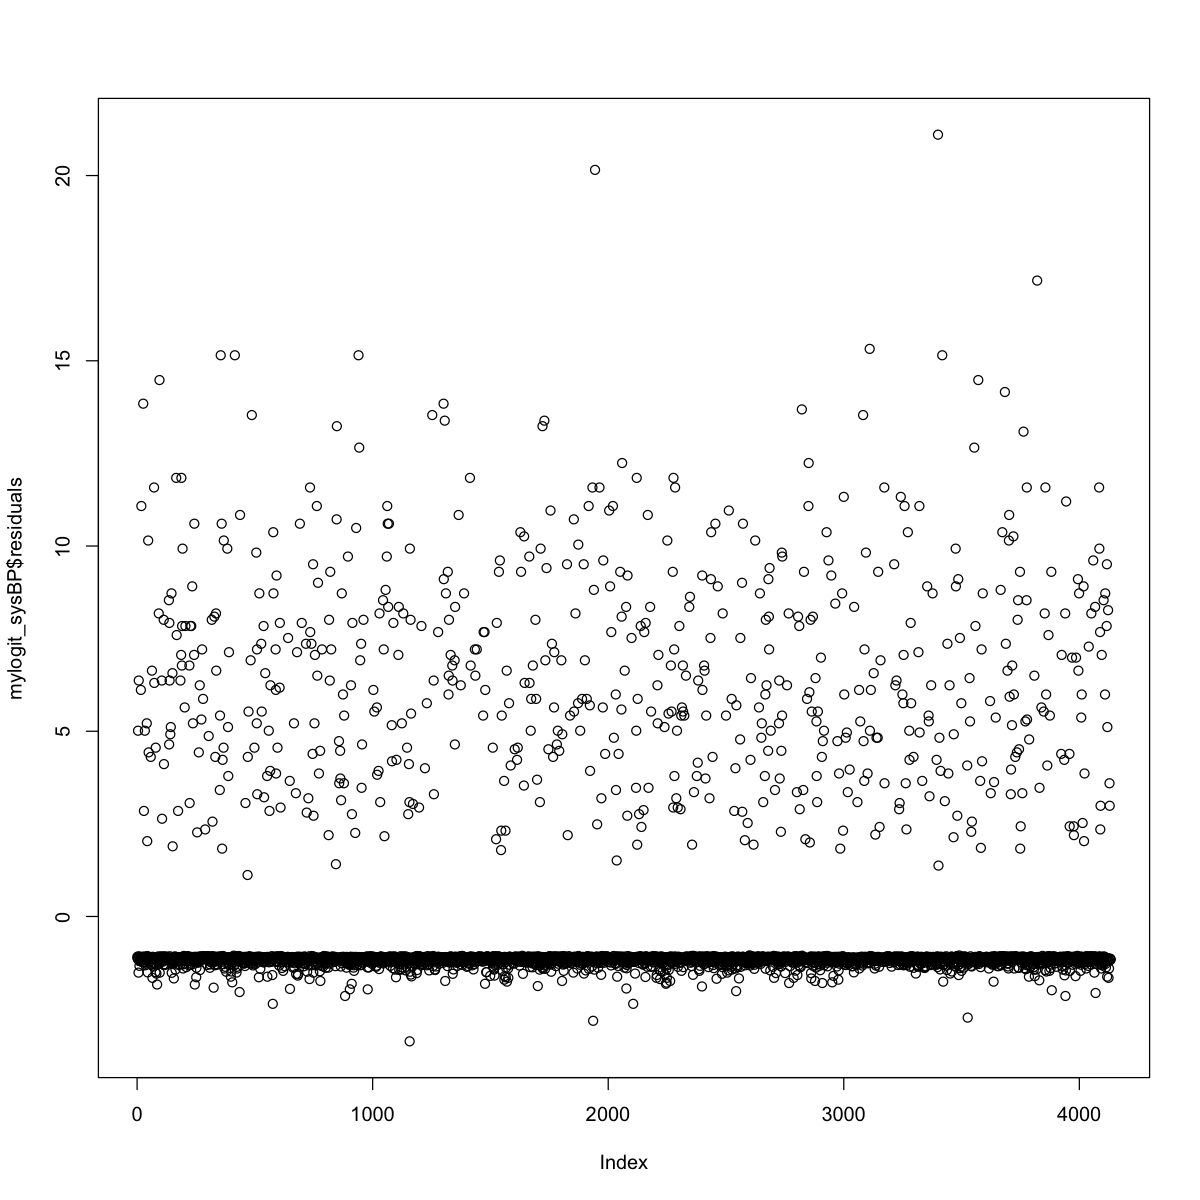

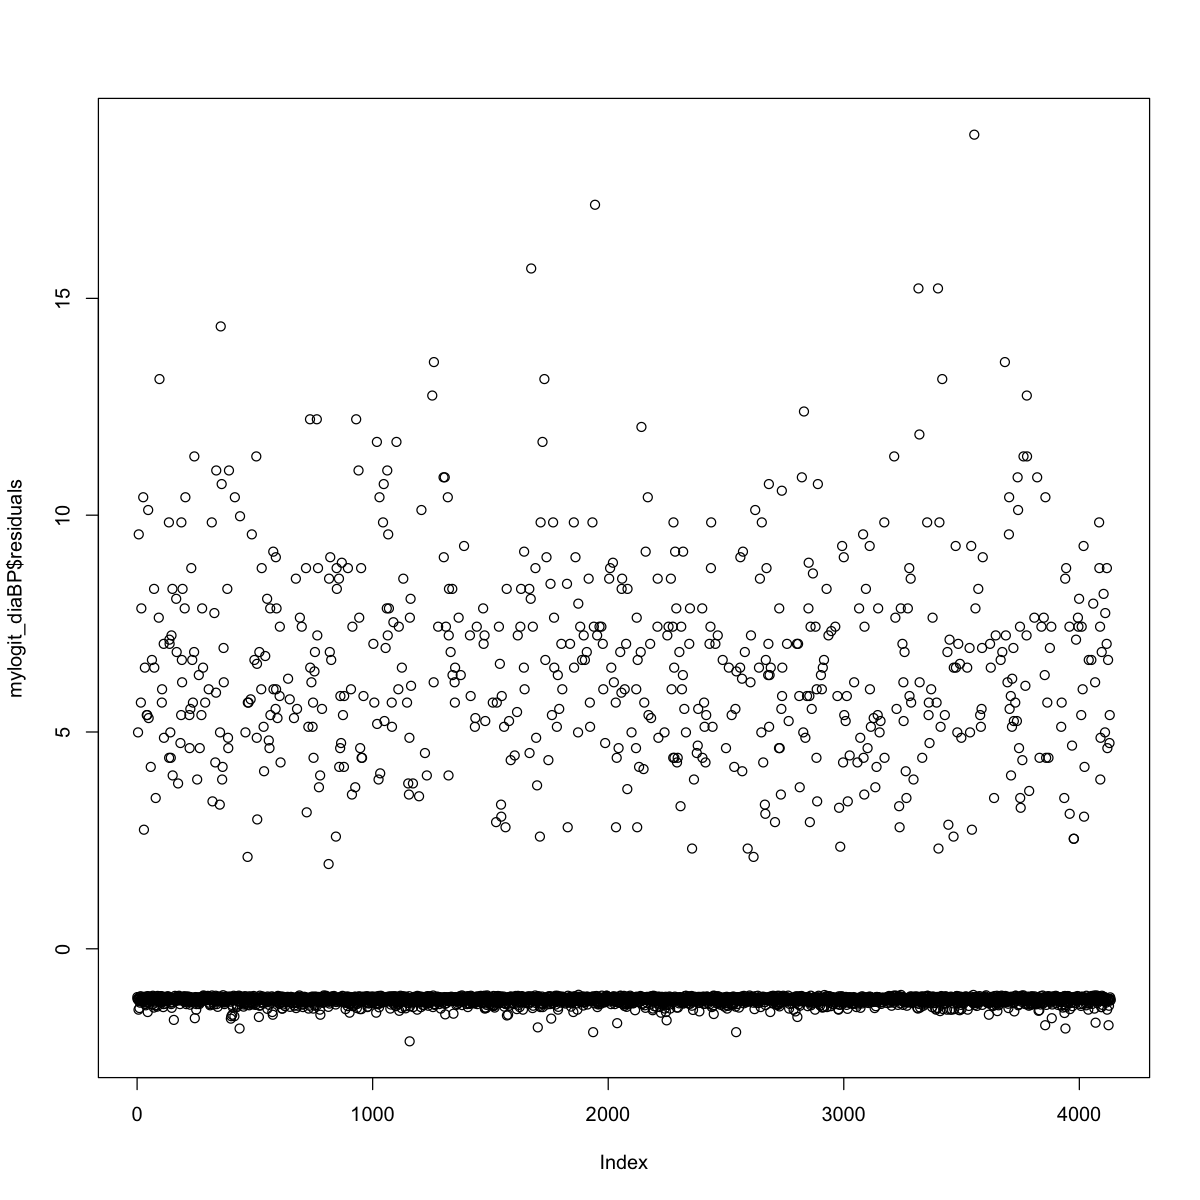

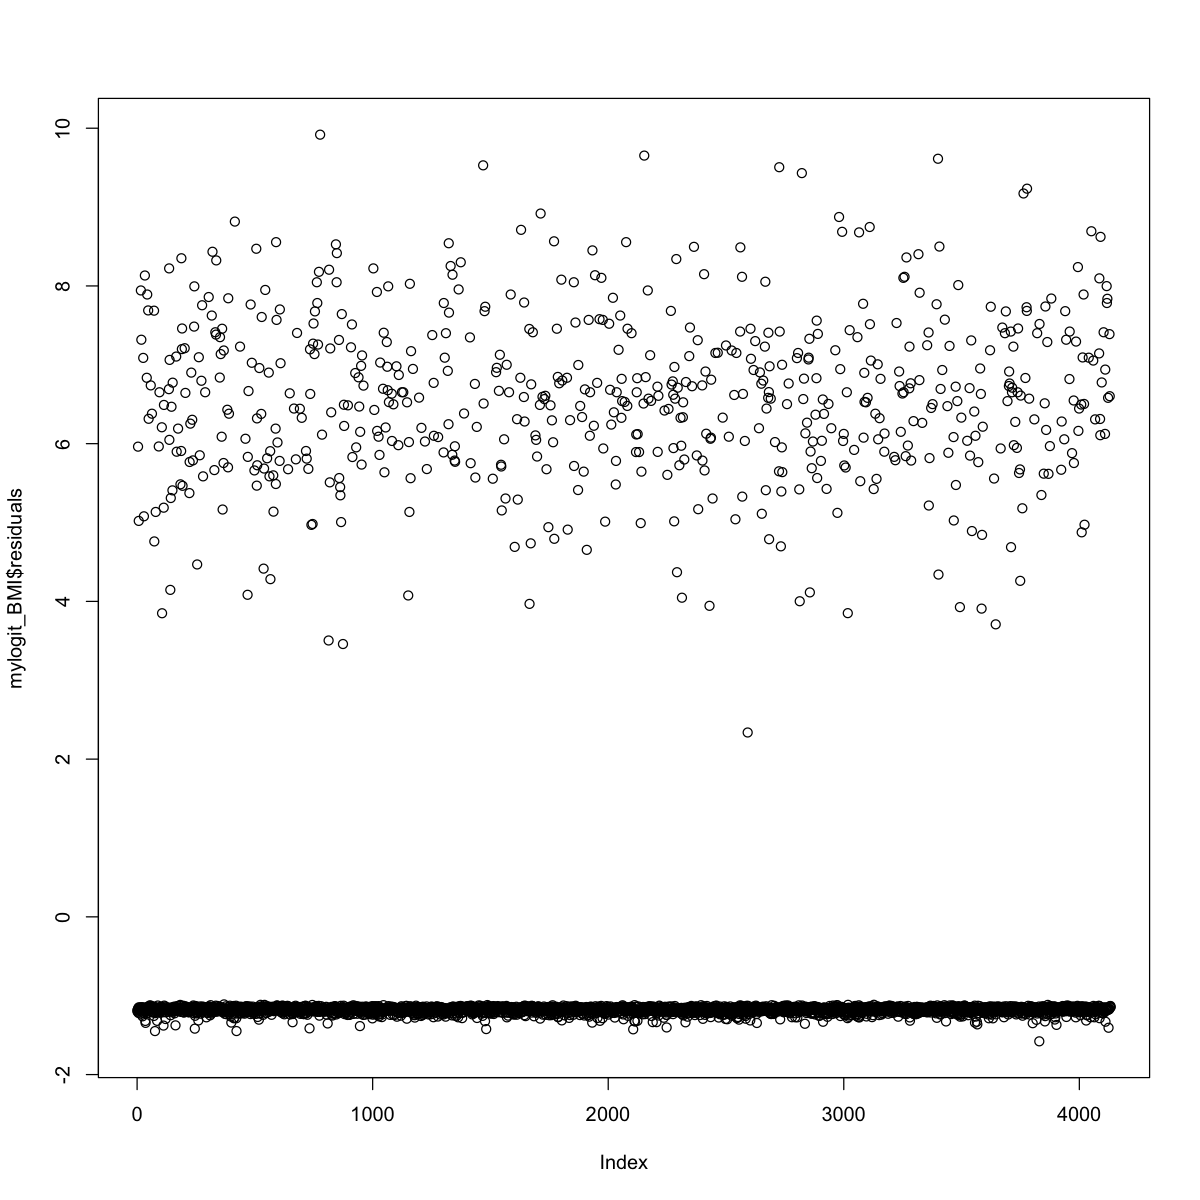

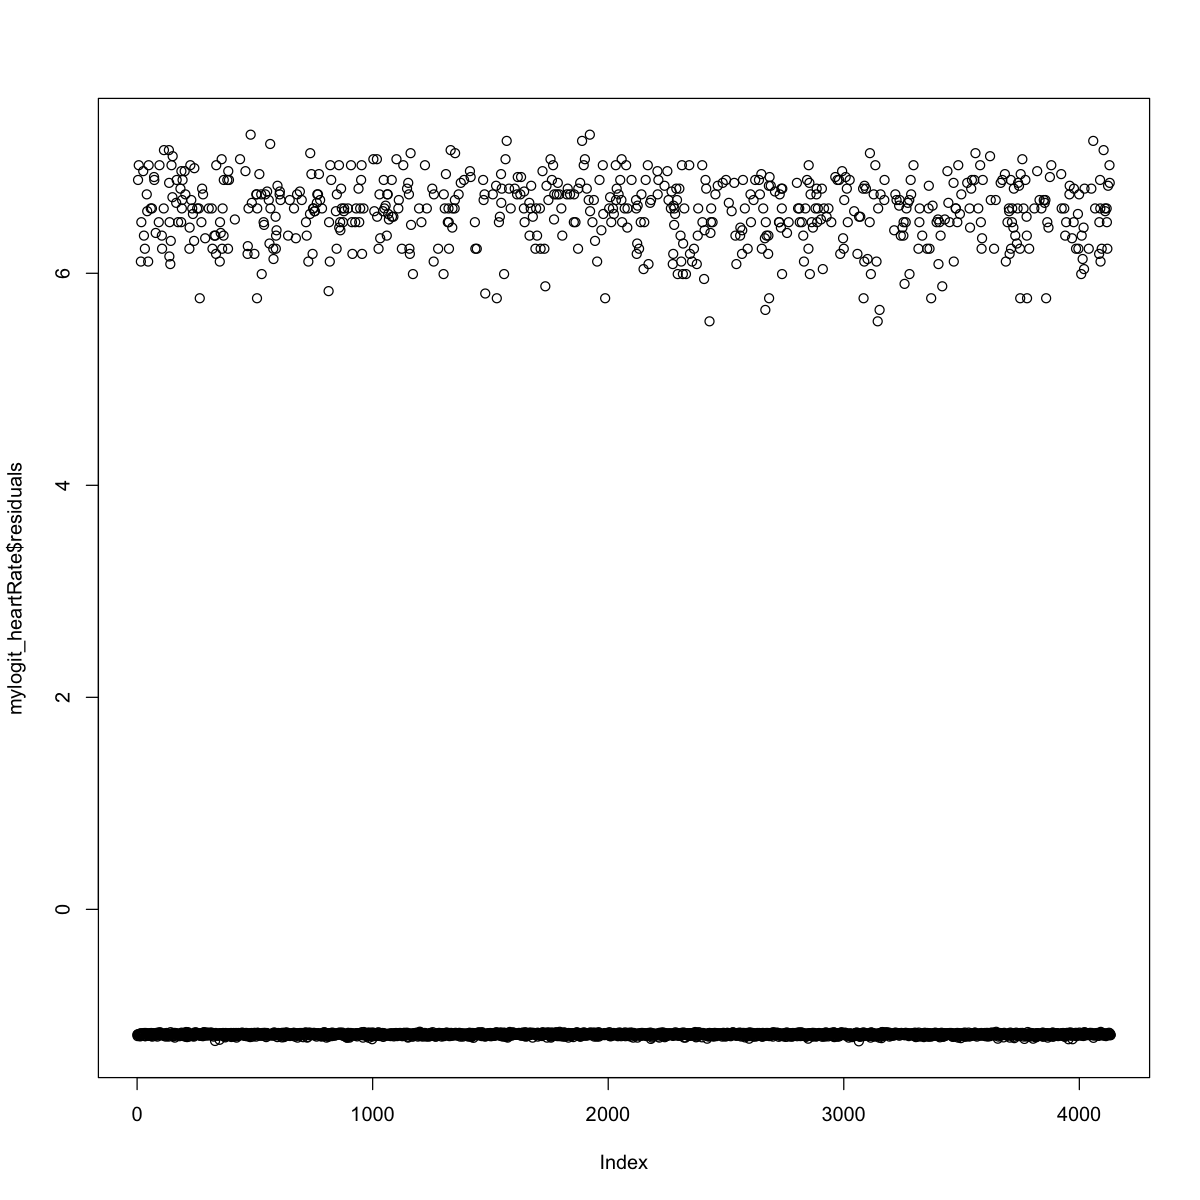

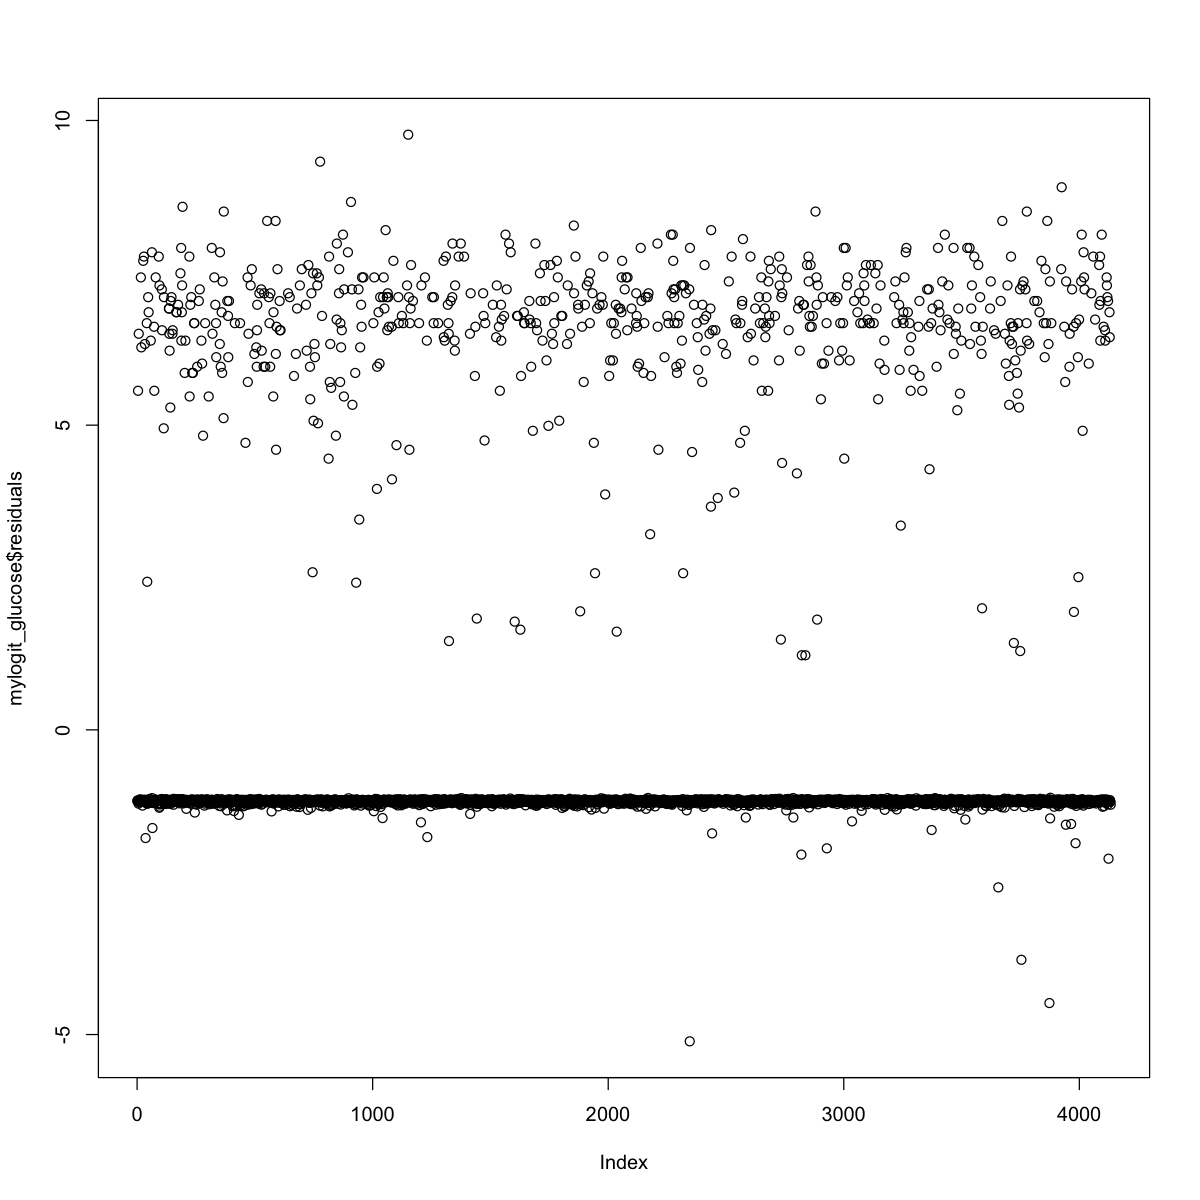

In [112]:
plot(mylogit_age$residuals) 
plot(mylogit_cigsPerDay$residuals) 
plot(mylogit_totChol$residuals) 
plot(mylogit_sysBP$residuals) 
plot(mylogit_diaBP$residuals) 
plot(mylogit_BMI$residuals) 
plot(mylogit_heartRate$residuals) 
plot(mylogit_glucose$residuals)

__*The points are evenly distributed  accross the x axis for all of the variables, so all of them meet the assumption of independence of errors*__

### Screening for outliers

In [116]:
infl_mylogit_age = influence.measures(mylogit_age) 
summary(infl_mylogit_age)

Potentially influential observations of
	 glm(formula = TenYearCHD ~ age, family = "binomial", data = logitdf) :

     dfb.1_ dfb.age dffit   cov.r   cook.d hat    
16    0.06  -0.05    0.06    1.00_*  0.00   0.00  
18    0.03  -0.03    0.04    1.00_*  0.00   0.00  
26    0.03  -0.02    0.04    1.00_*  0.00   0.00  
41    0.01  -0.01    0.04    1.00_*  0.00   0.00  
58    0.05  -0.05    0.06    1.00_*  0.00   0.00  
60    0.03  -0.04   -0.04    1.00_*  0.00   0.00_*
72    0.04  -0.04    0.05    1.00_*  0.00   0.00  
79    0.05  -0.05    0.06    1.00_*  0.00   0.00  
91    0.03  -0.03   -0.04    1.00_*  0.00   0.00_*
95    0.05  -0.05    0.06    1.00_*  0.00   0.00  
105   0.05  -0.05    0.06    1.00_*  0.00   0.00  
106  -0.05   0.05    0.06    1.00    0.00   0.00_*
108   0.03  -0.04   -0.04    1.00_*  0.00   0.00_*
113   0.02  -0.01    0.04    1.00_*  0.00   0.00  
120   0.03  -0.03   -0.04    1.00_*  0.00   0.00_*
136   0.05  -0.04    0.05    1.00_*  0.00   0.00  
137   0.02  -0.02  

In [117]:
infl_mylogit_cigsPerDay = influence.measures(mylogit_cigsPerDay) 
summary(infl_mylogit_cigsPerDay)

Potentially influential observations of
	 glm(formula = TenYearCHD ~ cigsPerDay, family = "binomial", data = logitdf) :

     dfb.1_ dfb.cgPD dffit   cov.r   cook.d hat    
31    0.01  -0.02    -0.03    1.00_*  0.00   0.00  
32    0.01  -0.03    -0.04    1.00_*  0.00   0.00_*
47   -0.02   0.08     0.09_*  1.00    0.00   0.00_*
77    0.01  -0.03    -0.04    1.00_*  0.00   0.00_*
86    0.01  -0.03    -0.04    1.00_*  0.00   0.00_*
105  -0.03   0.09     0.09_*  1.00    0.00   0.00_*
117   0.01  -0.03    -0.03    1.00_*  0.00   0.00_*
139   0.01  -0.03    -0.03    1.00_*  0.00   0.00_*
153   0.01  -0.03    -0.03    1.00_*  0.00   0.00_*
165   0.01  -0.03    -0.03    1.00_*  0.00   0.00_*
180   0.01  -0.03    -0.03    1.00_*  0.00   0.00_*
190  -0.02   0.08     0.09_*  1.00    0.00   0.00_*
200   0.01  -0.03    -0.03    1.00_*  0.00   0.00_*
211   0.01  -0.03    -0.04    1.00_*  0.00   0.00_*
222  -0.03   0.09     0.09_*  1.00    0.00   0.00_*
235   0.01  -0.03    -0.04    1.00_*  0.00   0.

In [118]:
infl_mylogit_totChol = influence.measures(mylogit_totChol) 
summary(infl_mylogit_totChol)

Potentially influential observations of
	 glm(formula = TenYearCHD ~ totChol, family = "binomial", data = logitdf) :

     dfb.1_ dfb.ttCh dffit   cov.r   cook.d hat    
4     0.02  -0.01     0.04    1.00_*  0.00   0.00  
7     0.03  -0.03     0.04    1.00_*  0.00   0.00  
14    0.02  -0.03    -0.03    1.00_*  0.00   0.00_*
16    0.02  -0.02     0.04    1.00_*  0.00   0.00  
33    0.03  -0.02     0.04    1.00_*  0.00   0.00  
58    0.03  -0.03     0.04    1.00_*  0.00   0.00  
63    0.02  -0.02     0.04    1.00_*  0.00   0.00  
72    0.02  -0.02     0.04    1.00_*  0.00   0.00  
85    0.02  -0.02    -0.03    1.00_*  0.00   0.00  
95    0.03  -0.03     0.04    1.00_*  0.00   0.00  
146   0.03  -0.02     0.04    1.00_*  0.00   0.00  
151   0.03  -0.02     0.04    1.00_*  0.00   0.00  
166   0.03  -0.02     0.04    1.00_*  0.00   0.00  
174  -0.05   0.06     0.07_*  1.00    0.00   0.00  
184   0.03  -0.02     0.04    1.00_*  0.00   0.00  
191  -0.15   0.16     0.16_*  1.01_*  0.01   0.01_

In [119]:
infl_mylogit_sysBP = influence.measures(mylogit_sysBP) 
summary(infl_mylogit_sysBP)

Potentially influential observations of
	 glm(formula = TenYearCHD ~ sysBP, family = "binomial", data = logitdf) :

     dfb.1_ dfb.syBP dffit   cov.r   cook.d hat    
6     0.03  -0.03    -0.04    1.00_*  0.00   0.00_*
7     0.01   0.00     0.03    1.00_*  0.00   0.00  
18    0.04  -0.04     0.05    1.00_*  0.00   0.00  
26    0.05  -0.05     0.05    1.00_*  0.00   0.00  
29   -0.05   0.06     0.07_*  1.00    0.00   0.00_*
43   -0.07   0.08     0.09_*  1.00_*  0.00   0.00_*
45    0.03  -0.03    -0.04    1.00_*  0.00   0.00_*
47    0.04  -0.03     0.04    1.00_*  0.00   0.00  
63    0.01  -0.01     0.03    1.00_*  0.00   0.00  
65    0.04  -0.05    -0.06    1.00_*  0.00   0.00_*
72    0.04  -0.04     0.05    1.00_*  0.00   0.00  
73    0.01   0.00     0.03    1.00_*  0.00   0.00  
78    0.03  -0.03    -0.04    1.00_*  0.00   0.00_*
82    0.03  -0.04    -0.04    1.00_*  0.00   0.00_*
85    0.06  -0.07    -0.07_*  1.00_*  0.00   0.00_*
92    0.02  -0.02     0.04    1.00_*  0.00   0.00  


In [120]:
infl_mylogit_diaBP = influence.measures(mylogit_diaBP) 
summary(infl_mylogit_diaBP)

Potentially influential observations of
	 glm(formula = TenYearCHD ~ diaBP, family = "binomial", data = logitdf) :

     dfb.1_ dfb.diBP dffit   cov.r   cook.d hat    
6     0.03  -0.03    -0.04    1.00_*  0.00   0.00_*
7     0.04  -0.04     0.05    1.00_*  0.00   0.00  
10    0.03  -0.03    -0.03    1.00_*  0.00   0.00  
18    0.02  -0.02     0.04    1.00_*  0.00   0.00  
26    0.05  -0.04     0.05    1.00_*  0.00   0.00  
29   -0.09   0.09     0.10_*  1.00_*  0.00   0.00_*
45    0.04  -0.04    -0.05    1.00_*  0.00   0.00_*
47    0.05  -0.04     0.05    1.00_*  0.00   0.00  
63    0.01  -0.01     0.03    1.00_*  0.00   0.00  
72    0.03  -0.03     0.04    1.00_*  0.00   0.00  
79   -0.06   0.07     0.07_*  1.00    0.00   0.00_*
92    0.02  -0.02     0.04    1.00_*  0.00   0.00  
95    0.06  -0.06     0.07    1.00_*  0.00   0.00  
113   0.02  -0.01     0.03    1.00_*  0.00   0.00  
135   0.04  -0.04     0.05    1.00_*  0.00   0.00  
137   0.02  -0.01     0.04    1.00_*  0.00   0.00  


In [121]:
infl_mylogit_BMI = influence.measures(mylogit_BMI) 
summary(infl_mylogit_BMI)

Potentially influential observations of
	 glm(formula = TenYearCHD ~ BMI, family = "binomial", data = logitdf) :

     dfb.1_ dfb.BMI dffit   cov.r   cook.d hat    
18    0.03  -0.02    0.04    1.00_*  0.00   0.00  
23    0.02  -0.02   -0.03    1.00_*  0.00   0.00  
26    0.02  -0.02    0.04    1.00_*  0.00   0.00  
35    0.04  -0.04   -0.05    1.00_*  0.00   0.00_*
36    0.05  -0.05   -0.05    1.00_*  0.00   0.00_*
41    0.01  -0.01    0.03    1.00_*  0.00   0.00  
71    0.02  -0.02   -0.03    1.00_*  0.00   0.00  
73   -0.06   0.06    0.07_*  1.00    0.00   0.00_*
76    0.08  -0.09   -0.09_*  1.01_*  0.00   0.01_*
85    0.04  -0.04   -0.05    1.00_*  0.00   0.00_*
106  -0.11   0.11    0.12_*  1.00_*  0.01   0.00_*
112   0.06  -0.06   -0.06    1.01_*  0.00   0.01_*
121   0.03  -0.03   -0.04    1.00_*  0.00   0.00_*
138   0.02  -0.02    0.04    1.00_*  0.00   0.00  
141  -0.09   0.10    0.10_*  1.00_*  0.00   0.00_*
163   0.06  -0.06   -0.06    1.01_*  0.00   0.01_*
166   0.02  -0.02  

In [122]:
infl_mylogit_heartRate = influence.measures(mylogit_heartRate) 
summary(infl_mylogit_heartRate)

Potentially influential observations of
	 glm(formula = TenYearCHD ~ heartRate, family = "binomial", data = logitdf) :

     dfb.1_ dfb.hrtR dffit   cov.r   cook.d hat    
65    0.02  -0.02    -0.02    1.00_*  0.00   0.00  
86    0.02  -0.02    -0.02    1.00_*  0.00   0.00  
97   -0.02   0.02    -0.02    1.00_*  0.00   0.00  
121   0.02  -0.02    -0.02    1.00_*  0.00   0.00  
134   0.02  -0.02    -0.02    1.00_*  0.00   0.00  
142  -0.02   0.02    -0.02    1.00_*  0.00   0.00  
160   0.03  -0.03    -0.03    1.00_*  0.00   0.00_*
203   0.02  -0.02    -0.02    1.00_*  0.00   0.00  
208  -0.02   0.02    -0.02    1.00_*  0.00   0.00  
212   0.02  -0.03    -0.03    1.00_*  0.00   0.00_*
216  -0.02   0.02    -0.02    1.00_*  0.00   0.00  
220   0.02  -0.02    -0.02    1.00_*  0.00   0.00  
241   0.02  -0.02    -0.02    1.00_*  0.00   0.00  
266  -0.09   0.09     0.10_*  1.00    0.01   0.00_*
285  -0.02   0.02    -0.02    1.00_*  0.00   0.00  
325   0.02  -0.02    -0.02    1.00_*  0.00   0.0

In [123]:
infl_mylogit_glucose = influence.measures(mylogit_glucose)
summary(infl_mylogit_glucose)

Potentially influential observations of
	 glm(formula = TenYearCHD ~ glucose, family = "binomial", data = logitdf) :

     dfb.1_ dfb.glcs dffit   cov.r   cook.d hat    
16    0.03  -0.02     0.04    1.00_*  0.00   0.00  
26    0.03  -0.02     0.04    1.00_*  0.00   0.00  
29    0.03  -0.02     0.04    1.00_*  0.00   0.00  
36    0.12  -0.13    -0.13_*  1.01_*  0.01   0.01_*
41    0.01   0.00     0.03    1.00_*  0.00   0.00  
43   -0.13   0.15     0.15_*  1.01_*  0.01   0.01_*
47    0.02  -0.01     0.03    1.00_*  0.00   0.00  
49    0.02  -0.01     0.03    1.00_*  0.00   0.00  
63    0.03  -0.02     0.04    1.00_*  0.00   0.00  
65    0.09  -0.10    -0.10_*  1.01_*  0.00   0.01_*
79    0.03  -0.02     0.04    1.00_*  0.00   0.00  
92    0.03  -0.02     0.04    1.00_*  0.00   0.00  
95    0.02  -0.01     0.04    1.00_*  0.00   0.00  
105   0.02  -0.01     0.04    1.00_*  0.00   0.00  
114   0.02  -0.01     0.03    1.00_*  0.00   0.00  
135   0.02  -0.01     0.03    1.00_*  0.00   0.00 

## Assumption Checking Summary
* The variables that meet the sample size assumption are __glucose__ and __sysBP__
* The variables that meet the linearity of the logit assumption are __BMI__, __cigsPerDay__, __diaBP__, __sysBP__, __heartRate__, and __totChol__.
* All of the variables have independent errors
* None of the variables have outliers:
    * dfb.1_ and dffit values are less than 1
    * hat < .3

## *In this dataset, only __sysBP__ meets all of the assumptions for logistic regression*

In [125]:
summary(mylogit_sysBP)


Call:
glm(formula = TenYearCHD ~ sysBP, family = "binomial", data = logitdf)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5588  -0.5812  -0.4935  -0.4201   2.4696  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -5.023674   0.258651  -19.42   <2e-16 ***
sysBP        0.024225   0.001819   13.31   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3521.9  on 4132  degrees of freedom
Residual deviance: 3344.0  on 4131  degrees of freedom
AIC: 3348

Number of Fisher Scoring iterations: 4


***
## If all of the variables had met the assumptions
### Method based on [www.utstat.toronto.edu](http://www.utstat.toronto.edu/~brunner/oldclass/appliedf11/handouts/2101f11StepwiseLogisticR.pdf)

### Run the full model

In [124]:
fullmod = glm(TenYearCHD ~ ., data = logitdf,family=binomial)
summary(fullmod)


Call:
glm(formula = TenYearCHD ~ ., family = binomial, data = logitdf)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9963  -0.6011  -0.4373  -0.3130   2.7336  

Coefficients: (4 not defined because of singularities)
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -8.096e+00  5.764e-01 -14.046  < 2e-16 ***
age                   6.674e-02  6.252e-03  10.675  < 2e-16 ***
cigsPerDay            2.721e-02  3.714e-03   7.327 2.36e-13 ***
totChol               9.151e-04  1.074e-03   0.852   0.3940    
sysBP                 1.559e-02  3.325e-03   4.689 2.74e-06 ***
diaBP                 8.944e-04  5.955e-03   0.150   0.8806    
BMI                   7.462e-03  1.155e-02   0.646   0.5182    
heartRate            -4.366e-03  3.899e-03  -1.120   0.2628    
glucose               4.534e-03  2.483e-03   1.826   0.0679 .  
Predicted_age                NA         NA      NA       NA    
Predicted_cigsPerDay         NA         NA      NA    

__*It seems that age, cigarretes per day, total cholesterol, systolic blood pressure and blood sugar are the only factors that are significant predictors*__

In [49]:
nullmodel = glm(TenYearCHD ~ 1, data = logitdf, family=binomial)
summary(nullmodel)


Call:
glm(formula = TenYearCHD ~ 1, family = binomial, data = logitdf)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.5741  -0.5741  -0.5741  -0.5741   1.9412  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.71941    0.04333  -39.68   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3521.9  on 4132  degrees of freedom
Residual deviance: 3521.9  on 4132  degrees of freedom
AIC: 3523.9

Number of Fisher Scoring iterations: 3


In [53]:
backwards = step(fullmod)

Start:  AIC=3182.42
TenYearCHD ~ age + cigsPerDay + totChol + sysBP + diaBP + BMI + 
    heartRate + glucose

             Df Deviance    AIC
- diaBP       1   3164.5 3180.5
- BMI         1   3164.8 3180.8
- totChol     1   3165.6 3181.6
- heartRate   1   3166.0 3182.0
<none>            3164.4 3182.4
- glucose     1   3185.6 3201.6
- sysBP       1   3187.1 3203.1
- cigsPerDay  1   3216.4 3232.4
- age         1   3279.9 3295.9

Step:  AIC=3180.5
TenYearCHD ~ age + cigsPerDay + totChol + sysBP + BMI + heartRate + 
    glucose

             Df Deviance    AIC
- BMI         1   3165.0 3179.0
- totChol     1   3165.7 3179.7
- heartRate   1   3166.1 3180.1
<none>            3164.5 3180.5
- glucose     1   3185.6 3199.6
- cigsPerDay  1   3216.5 3230.5
- sysBP       1   3222.0 3236.0
- age         1   3283.3 3297.3

Step:  AIC=3178.97
TenYearCHD ~ age + cigsPerDay + totChol + sysBP + heartRate + 
    glucose

             Df Deviance    AIC
- totChol     1   3166.2 3178.2
- heartRate   1   316

In [52]:
summary(backwards)


Call:
glm(formula = TenYearCHD ~ age + cigsPerDay + sysBP + glucose, 
    family = binomial, data = logitdf)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9066  -0.5978  -0.4388  -0.3150   2.7259  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -8.259360   0.385654 -21.417  < 2e-16 ***
age          0.066785   0.006017  11.099  < 2e-16 ***
cigsPerDay   0.026679   0.003688   7.234 4.69e-13 ***
sysBP        0.016245   0.001993   8.150 3.64e-16 ***
glucose      0.007477   0.001646   4.542 5.58e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3521.9  on 4132  degrees of freedom
Residual deviance: 3167.6  on 4128  degrees of freedom
AIC: 3177.6

Number of Fisher Scoring iterations: 5


In [54]:
forwards = step(nullmodel,
scope=list(lower=formula(nullmodel),upper=formula(fullmod)), direction="forward")

Start:  AIC=3523.92
TenYearCHD ~ 1

             Df Deviance    AIC
+ age         1   3306.4 3310.4
+ sysBP       1   3344.0 3348.0
+ diaBP       1   3438.2 3442.2
+ glucose     1   3477.9 3481.9
+ totChol     1   3494.1 3498.1
+ BMI         1   3501.3 3505.3
+ cigsPerDay  1   3510.9 3514.9
<none>            3521.9 3523.9
+ heartRate   1   3520.2 3524.2

Step:  AIC=3310.4
TenYearCHD ~ age

             Df Deviance    AIC
+ sysBP       1   3236.4 3242.4
+ cigsPerDay  1   3262.3 3268.3
+ diaBP       1   3262.8 3268.8
+ glucose     1   3280.5 3286.5
+ BMI         1   3298.9 3304.9
+ totChol     1   3302.8 3308.8
+ heartRate   1   3304.2 3310.2
<none>            3306.4 3310.4

Step:  AIC=3242.42
TenYearCHD ~ age + sysBP

             Df Deviance    AIC
+ cigsPerDay  1   3188.2 3196.2
+ glucose     1   3217.9 3225.9
<none>            3236.4 3242.4
+ totChol     1   3235.4 3243.4
+ BMI         1   3236.3 3244.3
+ heartRate   1   3236.4 3244.4
+ diaBP       1   3236.4 3244.4

Step:  AIC=3196.

In [55]:
summary(forwards)


Call:
glm(formula = TenYearCHD ~ age + sysBP + cigsPerDay + glucose, 
    family = binomial, data = logitdf)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9066  -0.5978  -0.4388  -0.3150   2.7259  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -8.259360   0.385654 -21.417  < 2e-16 ***
age          0.066785   0.006017  11.099  < 2e-16 ***
sysBP        0.016245   0.001993   8.150 3.64e-16 ***
cigsPerDay   0.026679   0.003688   7.234 4.69e-13 ***
glucose      0.007477   0.001646   4.542 5.58e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3521.9  on 4132  degrees of freedom
Residual deviance: 3167.6  on 4128  degrees of freedom
AIC: 3177.6

Number of Fisher Scoring iterations: 5


In [57]:
bothways = step(nullmodel, list(lower=formula(nullmodel),upper=formula(fullmod)),direction="both",trace=0)
summary(bothways)


Call:
glm(formula = TenYearCHD ~ age + sysBP + cigsPerDay + glucose, 
    family = binomial, data = logitdf)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9066  -0.5978  -0.4388  -0.3150   2.7259  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -8.259360   0.385654 -21.417  < 2e-16 ***
age          0.066785   0.006017  11.099  < 2e-16 ***
sysBP        0.016245   0.001993   8.150 3.64e-16 ***
cigsPerDay   0.026679   0.003688   7.234 4.69e-13 ***
glucose      0.007477   0.001646   4.542 5.58e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3521.9  on 4132  degrees of freedom
Residual deviance: 3167.6  on 4128  degrees of freedom
AIC: 3177.6

Number of Fisher Scoring iterations: 5


In [58]:
formula(backwards)

TenYearCHD ~ age + cigsPerDay + sysBP + glucose

In [59]:
formula(forwards)

TenYearCHD ~ age + sysBP + cigsPerDay + glucose

In [60]:
formula(bothways)

TenYearCHD ~ age + sysBP + cigsPerDay + glucose

## Method based on [www.sthda.com](http://www.sthda.com/english/articles/36-classification-methods-essentials/150-stepwise-logistic-regression-essentials-in-r/)

### Split the data into training and test set

In [45]:
training.samples = logitdf$TenYearCHD %>% createDataPartition(p= 0.8, list = FALSE)
train.data  <- logitdf[training.samples, ]
test.data <- logitdf[-training.samples, ]

### Fit the model

In [44]:
mylogit  = glm(TenYearCHD ~ ., data = logitdf, family = binomial) 

In [44]:
# default is stepwise regression going 
%>% stepAIC(trace = TRUE)

Start:  AIC=3182.42
TenYearCHD ~ age + cigsPerDay + totChol + sysBP + diaBP + BMI + 
    heartRate + glucose

             Df Deviance    AIC
- diaBP       1   3164.5 3180.5
- BMI         1   3164.8 3180.8
- totChol     1   3165.6 3181.6
- heartRate   1   3166.0 3182.0
<none>            3164.4 3182.4
- glucose     1   3185.6 3201.6
- sysBP       1   3187.1 3203.1
- cigsPerDay  1   3216.4 3232.4
- age         1   3279.9 3295.9

Step:  AIC=3180.5
TenYearCHD ~ age + cigsPerDay + totChol + sysBP + BMI + heartRate + 
    glucose

             Df Deviance    AIC
- BMI         1   3165.0 3179.0
- totChol     1   3165.7 3179.7
- heartRate   1   3166.1 3180.1
<none>            3164.5 3180.5
- glucose     1   3185.6 3199.6
- cigsPerDay  1   3216.5 3230.5
- sysBP       1   3222.0 3236.0
- age         1   3283.3 3297.3

Step:  AIC=3178.97
TenYearCHD ~ age + cigsPerDay + totChol + sysBP + heartRate + 
    glucose

             Df Deviance    AIC
- totChol     1   3166.2 3178.2
- heartRate   1   316

### Predict Probabilities Risk/No Risk for heart disease

In [36]:
probabilities = predict(mylogit, type = "response")
kgheart$Predicted = ifelse(probabilities > .5, 1, 0)

### Model Accuracy

In [38]:
conf_mat <- caret::confusionMatrix(as.factor(kgheart$Predicted), as.factor(kgheart$TenYearCHD))
conf_mat

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 3486  589
         1   19   39
                                          
               Accuracy : 0.8529          
                 95% CI : (0.8417, 0.8636)
    No Information Rate : 0.8481          
    P-Value [Acc > NIR] : 0.1995          
                                          
                  Kappa : 0.0903          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.9946          
            Specificity : 0.0621          
         Pos Pred Value : 0.8555          
         Neg Pred Value : 0.6724          
             Prevalence : 0.8481          
         Detection Rate : 0.8435          
   Detection Prevalence : 0.9860          
      Balanced Accuracy : 0.5283          
                                          
       'Positive' Class : 0               
                        

### Forward Elimination